# Анализ оттока клиентов фитнес-клубов

Задача:
    - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
    
    - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    
    - проанализировать основные признаки, наиболее сильно влияющие на отток;
    
    - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
        1) выделить целевые группы клиентов;
        
        2) предложить меры по снижению оттока;
        
        3) определить другие особенности взаимодействия с клиентами.

In [120]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 

<div class="alert alert-warning">


Совет:

    

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 



# Загрузка данных и изучение данных

In [121]:
# Загрузка датафрейма

df = pd.read_csv('/datasets/gym_churn.csv')



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет 🤔:
    

  
- Возможно не знаешь, но есть три таких интересных аргумента при чтении файла: parse_dates, sep, и decimal который можно использовать при чтении данных  в Pandas
- parse_dates позволяет указать, какие столбцы в DataFrame содержат даты и время (Если у нас установлен верный тип данных, это значит что мы можем легко вытасиквать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию)
- sep позволяет указать разделитель между столбцами в файле
- decimal используется для определения символа, используемого в качестве разделителя десятичных знаков. Это важно, если в файле используется запятая (,) вместо точки (.) как разделитель десятичных знаков.


Используя эти аргументы, можно корректно считывать данные из CSV (xlsx) файла    


Сейчас это не нужно, но в будущих проектах может пригодиться

    

In [122]:
# изучаем данные
display(df)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Данные загрузились нормально.

In [123]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


В первом приближении проблем не видно , будем копать дальше))

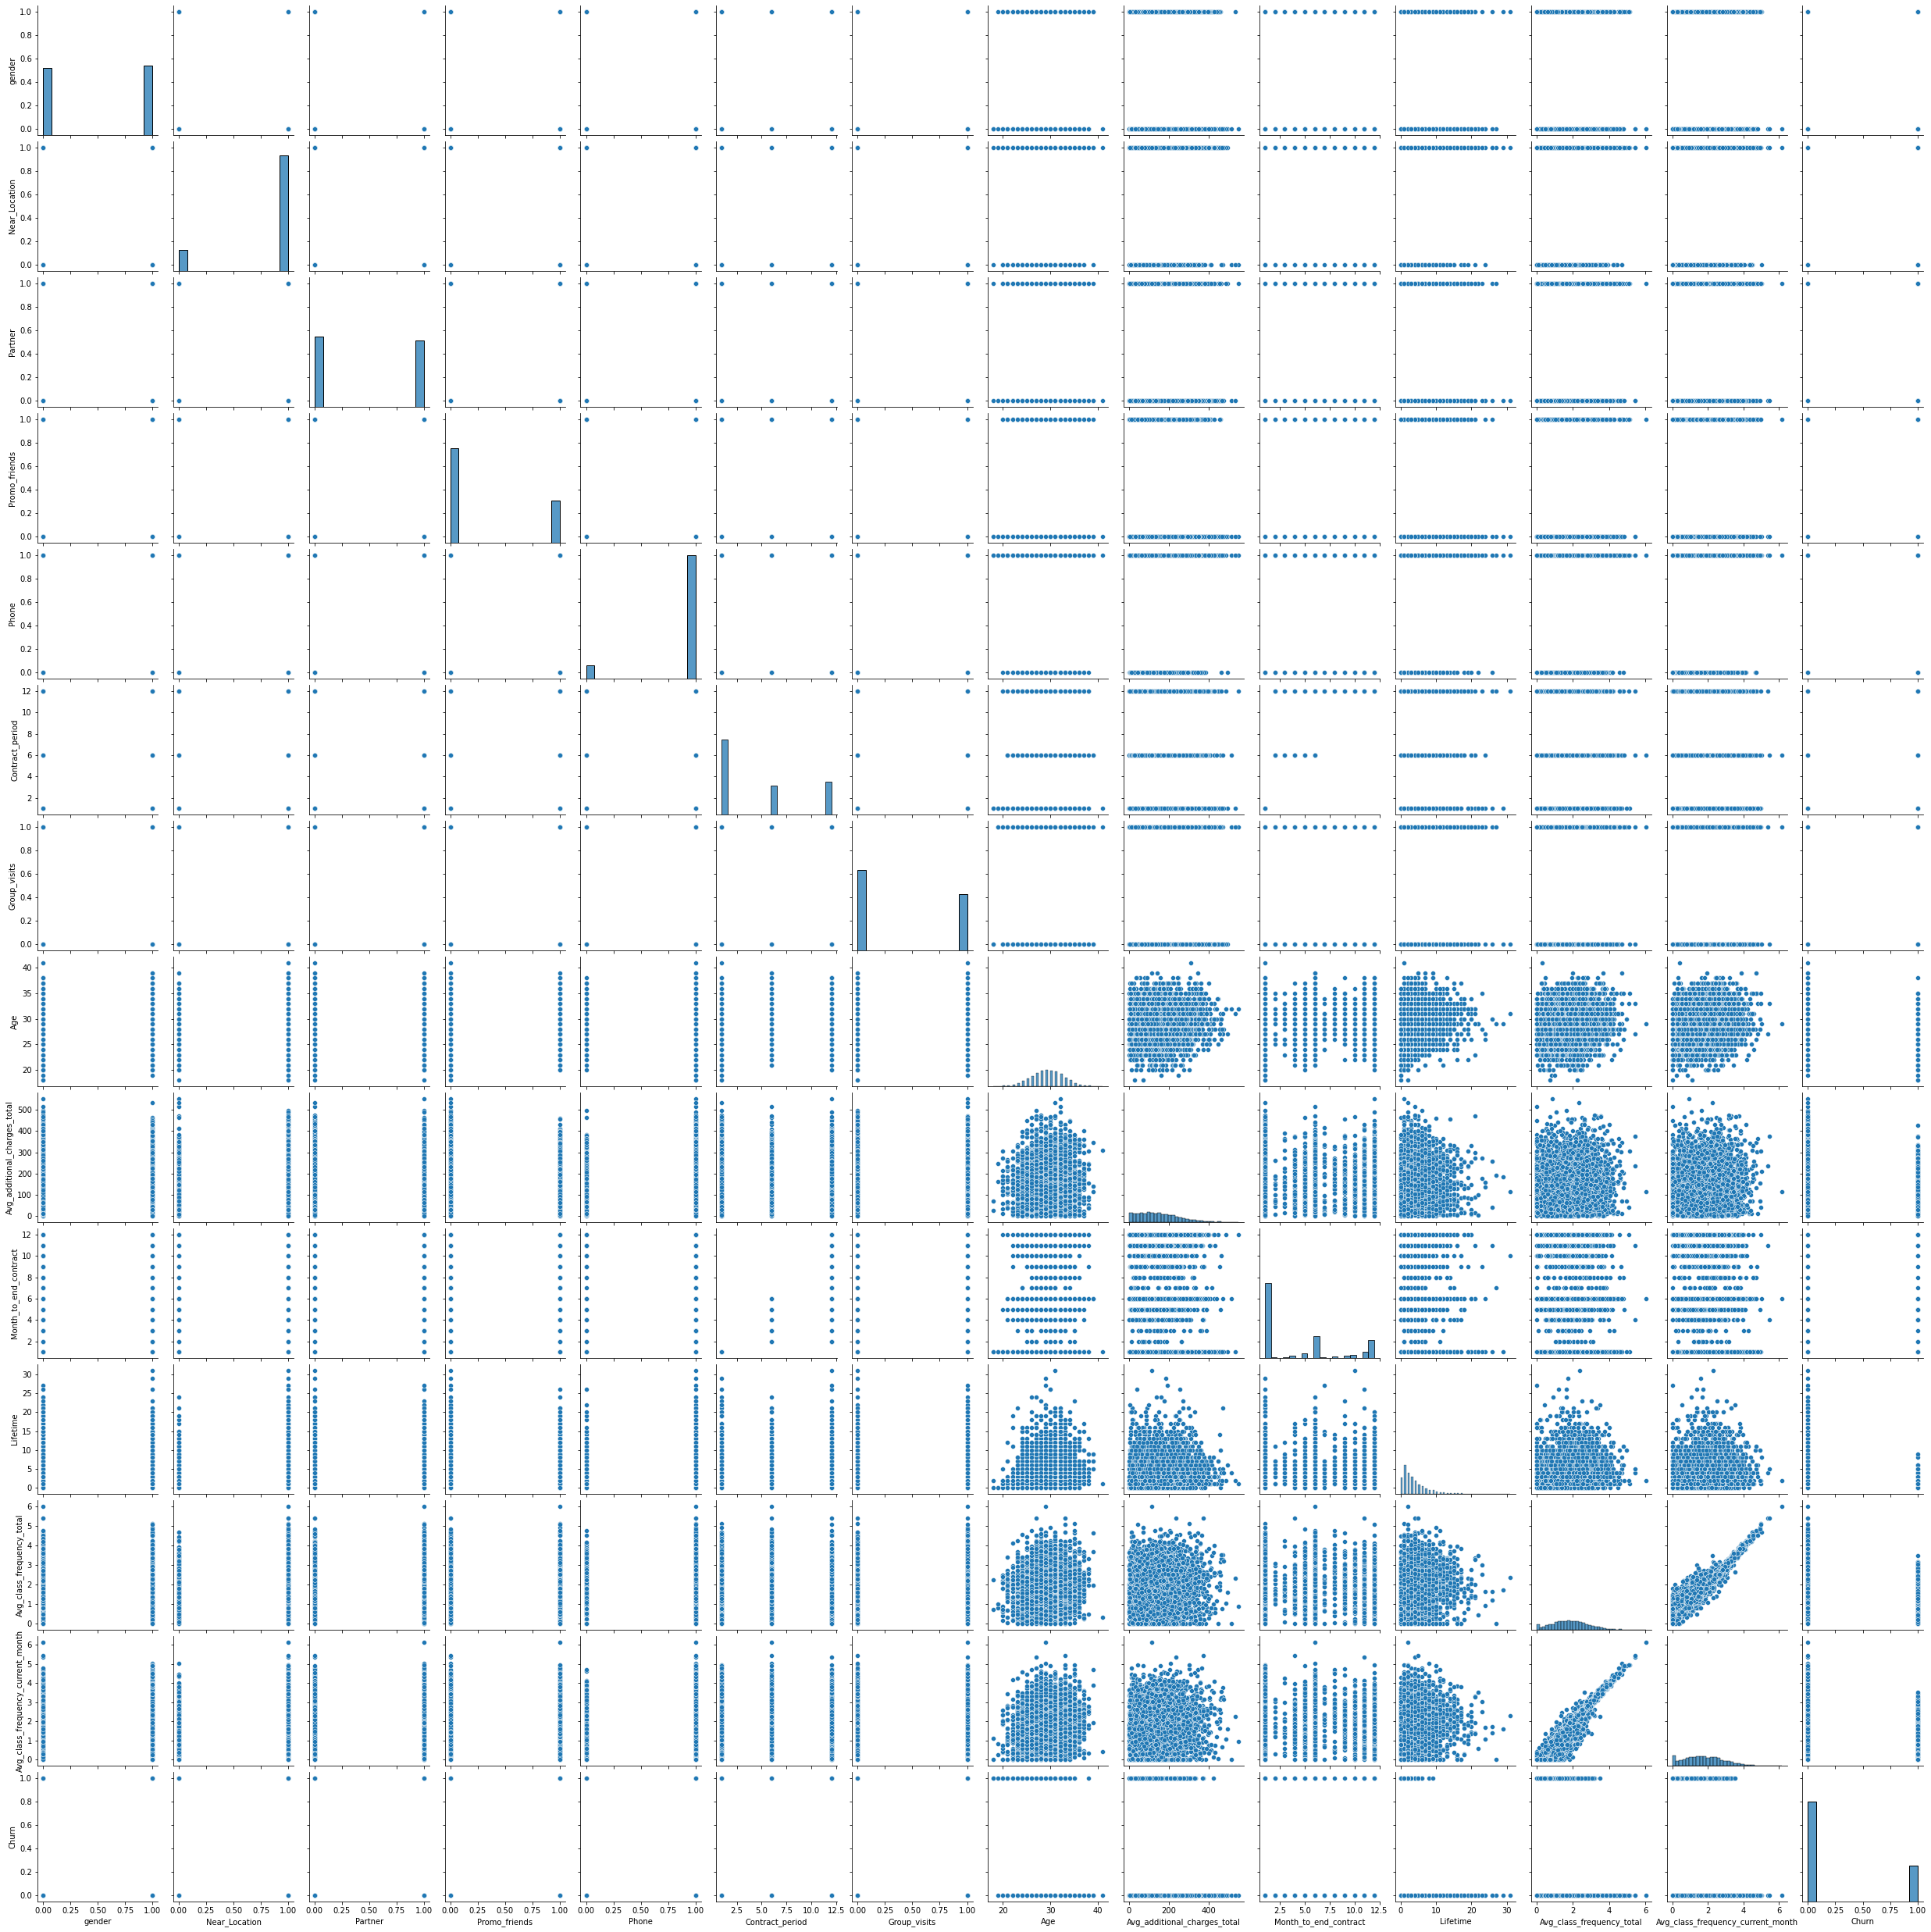

In [124]:
sns.pairplot(df);

Ничего не видно, ничего не понятно, вернемся к этому позже))

# Предобработка

Проверим на "нули"

In [125]:
df['Contract_period'].unique()

array([ 6, 12,  1])

In [126]:
df['Age'].unique()

array([29, 31, 28, 33, 26, 34, 32, 30, 23, 27, 35, 25, 36, 24, 21, 37, 22,
       19, 20, 38, 39, 18, 41])

In [127]:
df['Avg_additional_charges_total'].unique()

array([ 14.22747042, 113.20293765, 129.44847933, ...,  78.25054157,
        61.91265691, 178.86181361])

In [128]:
df['Month_to_end_contract'].unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

In [129]:
df['Lifetime'].unique()

array([ 3,  7,  2,  0,  1, 11,  4,  8, 14,  6,  5, 15, 12, 21, 10, 20,  9,
       13, 17, 16, 24, 22, 31, 26, 23, 18, 19, 27, 29])

In [130]:
df['Avg_class_frequency_total'].unique()

array([0.02039795, 1.92293606, 1.85909835, ..., 2.78614636, 1.63010814,
       1.10183221])

In [131]:

df['Avg_class_frequency_current_month'].unique()

array([0.        , 1.91024352, 1.73650189, ..., 2.8314395 , 1.59623664,
       1.03526976])

А вот тут нашелся один "ноль". Посмотрим на его.


Text(0.5, 1.0, 'распределение частоты посещений в месяц')

<Figure size 7200x576 with 0 Axes>

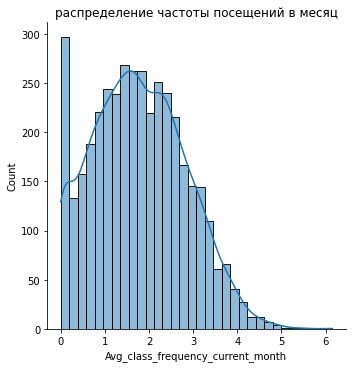

In [132]:
plt.figure(figsize=(100, 8))
sns.displot (df['Avg_class_frequency_current_month'], kde= True )
plt.title("распределение частоты посещений в месяц")

Нулевых значений много. С одной стороны их удалять не стоит, но нули сильно исказят картину данного параметра.

In [133]:
df = df[df['Avg_class_frequency_current_month'] != 0]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 1 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             3819 non-null   int64  
 1   Near_Location                      3819 non-null   int64  
 2   Partner                            3819 non-null   int64  
 3   Promo_friends                      3819 non-null   int64  
 4   Phone                              3819 non-null   int64  
 5   Contract_period                    3819 non-null   int64  
 6   Group_visits                       3819 non-null   int64  
 7   Age                                3819 non-null   int64  
 8   Avg_additional_charges_total       3819 non-null   float64
 9   Month_to_end_contract              3819 non-null   float64
 10  Lifetime                           3819 non-null   int64  
 11  Avg_class_frequency_total          3819 non-null   float

Всего нулевых чуть больше 4,5%

Распределение возраста имеет вид нормального, значит аномалий в данных нет.


<Figure size 7200x576 with 0 Axes>

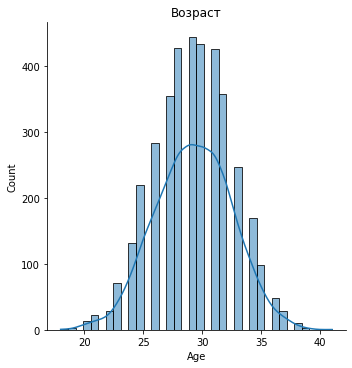

In [135]:
plt.figure(figsize=(100, 8))
sns.displot (df['Age'], kde= True )
plt.title("Возраст")
print('Распределение возраста имеет вид нормального, значит аномалий в данных нет.')

Основную выручку от других услуг фитнес-центра приносят не дорогие услуги, с увеличением стоимости услуги ее значение в выручке падает.


<Figure size 7200x576 with 0 Axes>

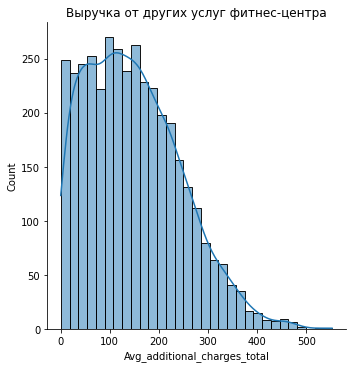

In [136]:
plt.figure(figsize=(100, 8))
sns.displot (df['Avg_additional_charges_total'], kde= True )
plt.title("Выручка от других услуг фитнес-центра");
print('Основную выручку от других услуг фитнес-центра приносят не дорогие услуги, с увеличением стоимости услуги ее значение в выручке падает.')

Тут все закономерно, люди берут на 1, 6 и 12 месяцев абонементы.


<Figure size 7200x576 with 0 Axes>

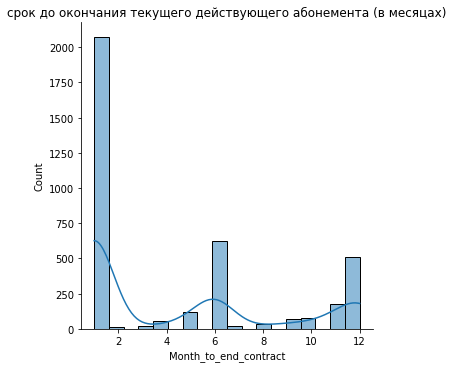

In [137]:
plt.figure(figsize=(100, 8))
sns.displot (df['Month_to_end_contract'], kde= True )
plt.title("срок до окончания текущего действующего абонемента (в месяцах)")
print('Тут все закономерно, люди берут на 1, 6 и 12 месяцев абонементы.')

Время жизни клиентов постепенно уменьшается, пик - 1 месяц. Увеличение времени жизни - точка роста.


<Figure size 7200x576 with 0 Axes>

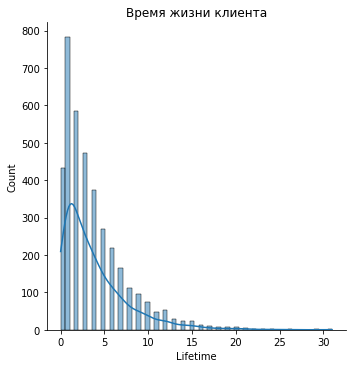

In [138]:
plt.figure(figsize=(100, 8))
sns.displot (df['Lifetime'], kde= True )
plt.title("Время жизни клиента")
print('Время жизни клиентов постепенно уменьшается, пик - 1 месяц. Увеличение времени жизни - точка роста.')

Text(0.5, 1.0, 'средняя частота посещений в неделю')

<Figure size 7200x576 with 0 Axes>

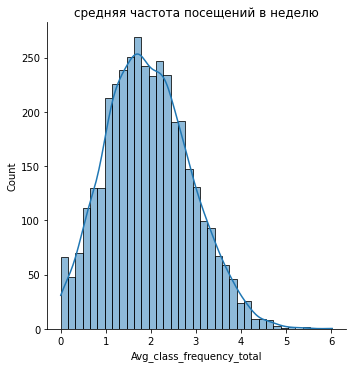

In [139]:
plt.figure(figsize=(100, 8))
sns.displot (df['Avg_class_frequency_total'], kde= True )
plt.title("средняя частота посещений в неделю")


В среднем люди ходят 2 раза в неделю. Есть те, кто "живет" в фитнес-центрах и посещает 5 и более раз в неделю.


<Figure size 7200x576 with 0 Axes>

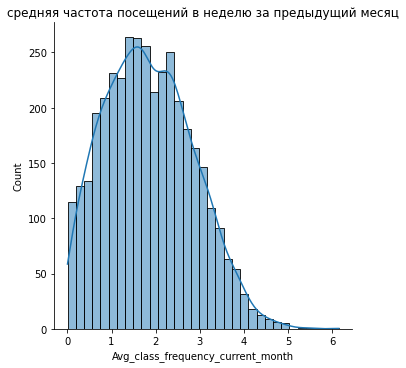

In [140]:
plt.figure(figsize=(100, 8))
sns.displot (df['Avg_class_frequency_current_month'], kde= True )
plt.title("средняя частота посещений в неделю за предыдущий месяц")
print('В среднем люди ходят 2 раза в неделю. Есть те, кто "живет" в фитнес-центрах и посещает 5 и более раз в неделю.')

Выводы по разделу:
    Распределение возраста имеет вид нормального, значит аномалий в данных нет.
    Основную выручку от других услуг фитнес-центра приносят не дорогие услуги, с увеличением стоимости услуги ее значение в выручке падает.
    Тут все закономерно, люди берут на 1, 6 и 12 месяцев абонементы.
    Время жизни клиентов постепенно уменьшается, пик - 1 месяц. Увеличение времени жизни - точка роста.
    В среднем люди ходят 2 раза в неделю. Есть те, кто "живет" в фитнес-центрах и посещает 5 и более раз в неделю.

# Работа с данными

In [141]:
df_new=df.copy(deep=True)
#df_new.info()

In [142]:
# скопируем датафрейм и создадим новый столбец с информацией о клиенте, ушел или остался
df_new['Churn_str'] = df_new['Churn']
df_new['Churn_str']=df_new['Churn_str'].astype (str)
value = ['0', '1']
name = ['Остался', 'Ушел']
rng = len(name)
for i in range(rng):
    fltr = df_new['Churn_str'].str.contains(value[i])
    df_new.loc[fltr, 'Churn_str'] = df_new.loc[fltr, 'Churn_str'].str.replace(value[i], name[i], case=False)

unique_values = df_new['Churn_str'].unique()
print(unique_values)

['Остался' 'Ушел']


In [143]:
Churn = df_new.groupby('Churn_str', as_index=False).agg(
    {'Age':'mean',
    'Lifetime':'mean',
    'Month_to_end_contract':'mean',
    'Avg_class_frequency_total':'mean',
    'Avg_class_frequency_current_month':'mean',
    'Avg_additional_charges_total':'mean'
    }
)
Churn


,Churn_str,Age,Lifetime,Month_to_end_contract,Avg_class_frequency_total,Avg_class_frequency_current_month,Avg_additional_charges_total
0,Остался,29.986860,4.709198,5.280083,2.057728,2.060838,158.314165
1,Ушел,27.007551,0.989213,1.645092,1.615886,1.195537,115.462912


Анализируя ушедших и оставшихся пользователей видны ощутимые различия в параметрах. \
Так время жизни оставшихся пользователей почти в 5 раз больше чем у ушедших (4,71 против 0,99).\
Оставшиеся пользователи имеют более долгосрочные абонементы (5,28 против 1,65).\
По средней частоте посещений незначительно выигрывают оставшиеся пользователи (2,06 против 1,62).\
Но если сравнивать среднюю частоту посещений за этот и предыдущий месяц то у группы ушедших есть рост этого параметра. оставшиеся же стабильны.\
Также оставшиеся пользователи приносят больше выручки от доп. услуг (158,3 против 115,5)

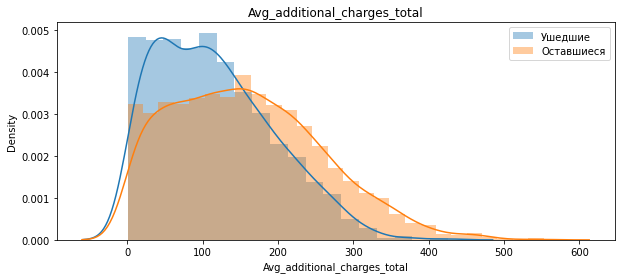

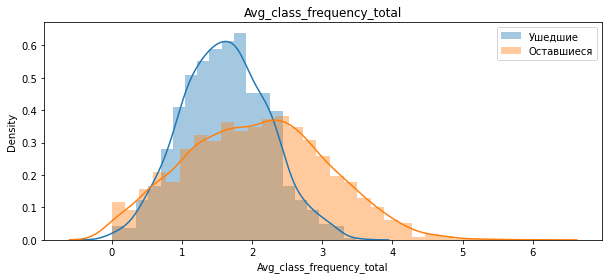

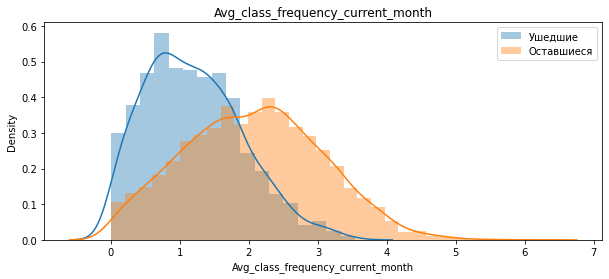

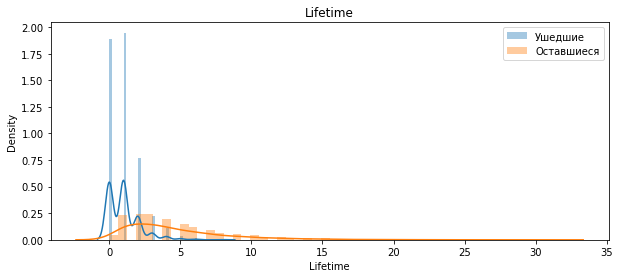

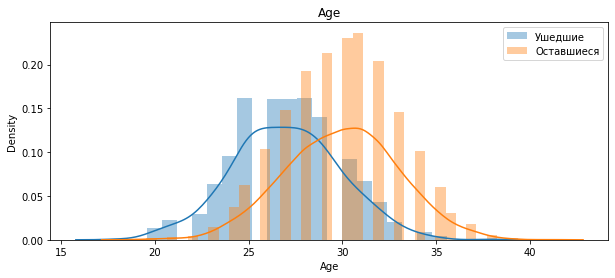

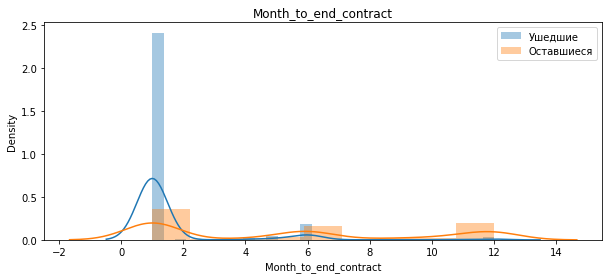

In [144]:
#выделим не категорийные значения
columns = [
    'Avg_additional_charges_total', 'Avg_class_frequency_total', 
           'Avg_class_frequency_current_month', 'Lifetime', 'Age', 'Month_to_end_contract'
           ]
warnings.filterwarnings("ignore")
for column in columns: 
  plt.figure(figsize=(10,4)) 
  plt.title(column)
  sns.distplot(df_new[df_new['Churn_str']=='Ушел'][column], label='Ушедшие', kde=True)
  sns.distplot(df_new[df_new['Churn_str']=='Остался'][column], label='Оставшиеся', kde=True)
  plt.legend()
  plt.show()

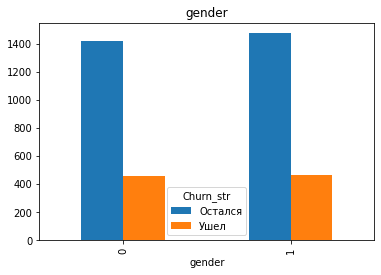

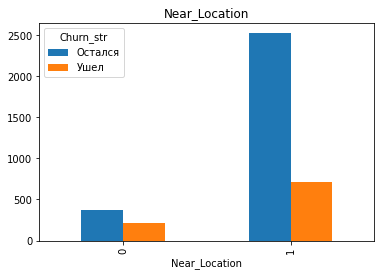

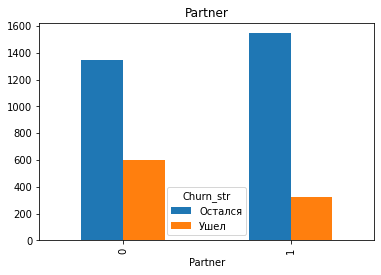

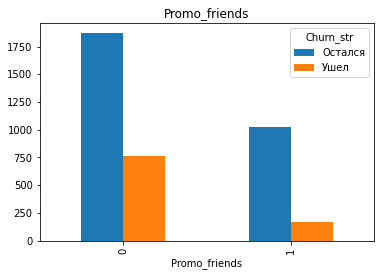

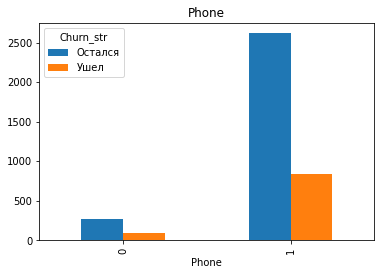

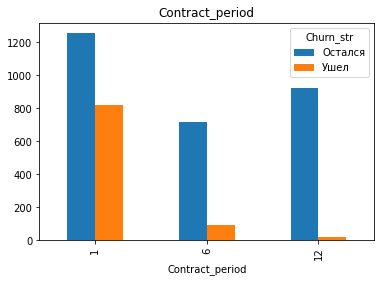

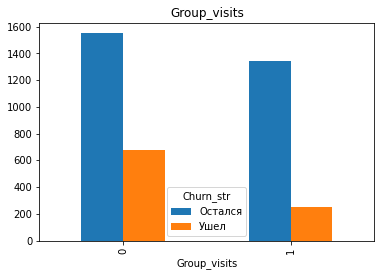

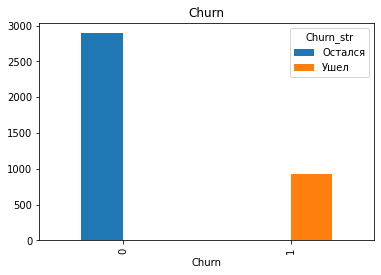

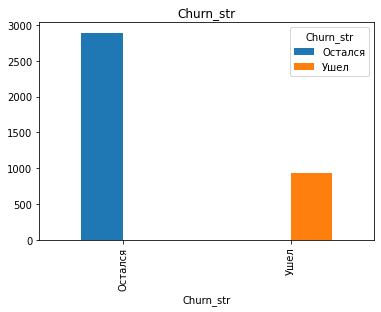

In [145]:
for column in df_new.columns:
  if column not in columns:
    data = df_new.groupby([column, 'Churn_str']).size().unstack()
    data.plot(kind='bar')
    plt.title(column)
    plt.show()

По половому признаку различий в группах (ушедшие и оставшиеся) не имеется.\
Больше остаются те, кому территориально удобнее.\
Больше остаются партнеры клуба. Развитие партнерских программ одно из прибыльных направлений.\
А вот акция "приведи друга" работает не так хорошо, да доля ушедших мала, но она есть. Возможно плохо работает удержание клиента вцелом.\
В основном уходят те, кто брал абонементы на короткий срок (1 месяц). Далее процент ушедших резко снижается.\
Любители групповых программ остаются чаще, чем их ненависники.\
По возрасту  больше уходят более молодые клиенты, возможно из-за того, что они более мобильные в выборе места проживания. Но по среднему созрасту значимых различий нет.\
Характер зависимости суммарной выручки от доп услуг для двух групп не различается, но есть одно "но" - оставшиеся приносят больше выручки (возможно из-за того, что их количество больше.\
В среднем ушедшие больше берут короткосрочные абонементы. Частота заключения абонементов на 6 и 12 месяцев для группы "оставшиеся" сопоставима.\
Ушедшие имеют короткосрочное время жизни.\
Оставшиеся клиенты посещают чаще фитнес-центр.

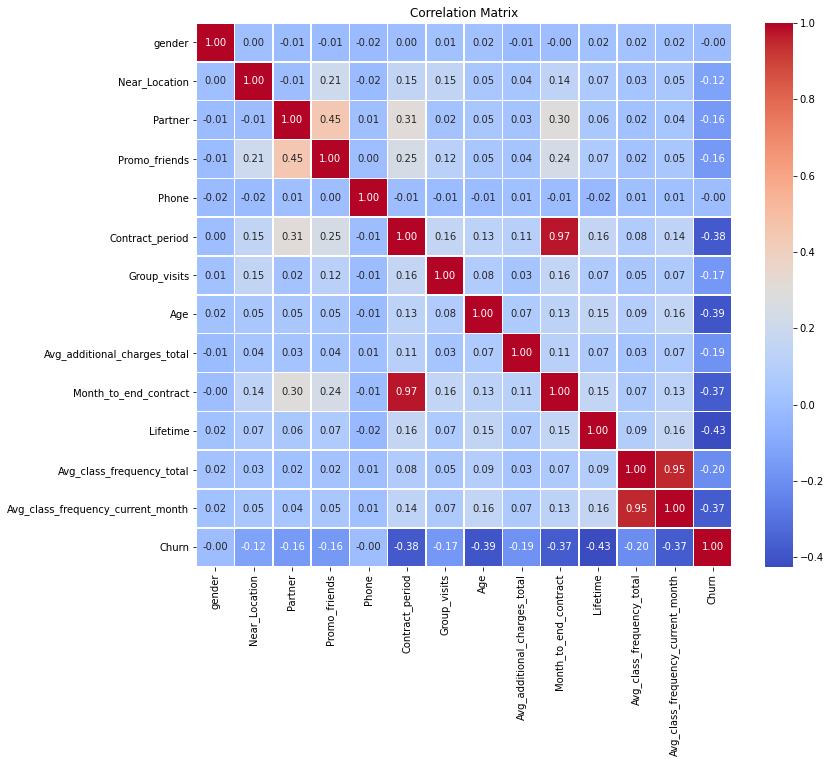

In [146]:
# матрица корреляции
correlation_matrix = df.corr()

# визуализируем матрицу корреляции с помощью тепловой карты

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Большинство признаков показывают слабую корреляцию.
Значительная корреляция наблюдается между:\
    -длительностью абонемента и сроком до окончания абонемента\
    -средней частотой посещений в неделю за предыдущий месяц и средней частотой посещений в неделю за все время с начала действия абонемента

phik использовать не могу, т.к. работаю сразу на платформе практикума.

In [147]:
#df.info()

In [148]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Логистическая регрессия
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Случайный лес
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Оценка метрик
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

# Оцените метрики для логистической регрессии
accuracy_logreg, precision_logreg, recall_logreg = evaluate_model(y_test, y_pred_logreg)

# Оцените метрики для случайного леса
accuracy_rf, precision_rf, recall_rf = evaluate_model(y_test, y_pred_rf)

# Выведите результаты
print("Логистическая регрессия:")
print(f"Accuracy: {accuracy_logreg:.4f}, Precision: {precision_logreg:.4f}, Recall: {recall_logreg:.4f}")

print("\nСлучайный лес:")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")


Логистическая регрессия:
Accuracy: 0.9071, Precision: 0.8289, Recall: 0.7368

Случайный лес:
Accuracy: 0.9110, Precision: 0.8552, Recall: 0.7251



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



- Работа выполнена в соответствии с критериями: обучаем на train, оцениваем на валидационной
    
    
- Здорово что используешь функцию для подсчёта метрик    


<div class="alert alert-warning">


Совет: 


    
Совет 0.
    
    
    
На логистической регрессии неплохо было бы провести шкалирование данных    
    
    
    
    
Совет 1.

Тем не менее хочу напомнить о логике использования датасетов когда пробуем несколько моделей и выбираем лучшую:    
    
1. На train мы обучаем
2. По валидации смотрим на результаты обучения (следим чтобы не было переобучения и/или делаем подбор гиперпараметров, если есть подбор гиперпараметров). И выбираем лучшую модель. 
3. Тестовая (out-of_sample) у нас для финальной проверки, когда определена лучшая модель с конкретными гиперпараметрами (или лучшая по дефолтным). 
    
[Вот](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0   ) тут можно дополнительно почитать.

    
Так что если все делать правильно, то нужно 3 разных датасета. На валидационном датасете находим  лучшую модель (лучше конечно не по дефолтным значениям, а добавить какой то перебор гиперпараметров в цикле) и только затем, выбрав лучшую модель (с лучшими значениями гиперпараметров) проведем тестирование на датасете о котором наша модель не имеет никакого представления. И если окажется что тестовая метрика наша лучшая на валидации модель не удовлетворяет критериям качества, то мы начнем процесс моделирования с начала (а не будем пробовать другие модели которые были хуже на валидации - по приниципу "а вдруг другая модель подойдет").   



Совет 2.

Как можно улучшить метрику: 


- Для RF можно в цикле поперебирать лучшие гиперпараметр, чтобы улучшить метрику


- Попробовать передать в модель параметр учитывающий дисбланас классов  




</div>


Метрика Accuracy в обоих случаях достаточно высокая и близка к 1, но в случае случайного леса она выше (0,911 против 0,907).\
Поэтому точность модели случайный лес немного, но выше.\
Также метрика Precision выше у случайного леса (0,855 против 0,829).\
Поэтому надежность модели случайный лес выше.\
В нашем случае модель случайный лес имеет большую точность предсказаний,\
не смотря на более низкий показатель Recall (0.725 против 0,737)

In [149]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


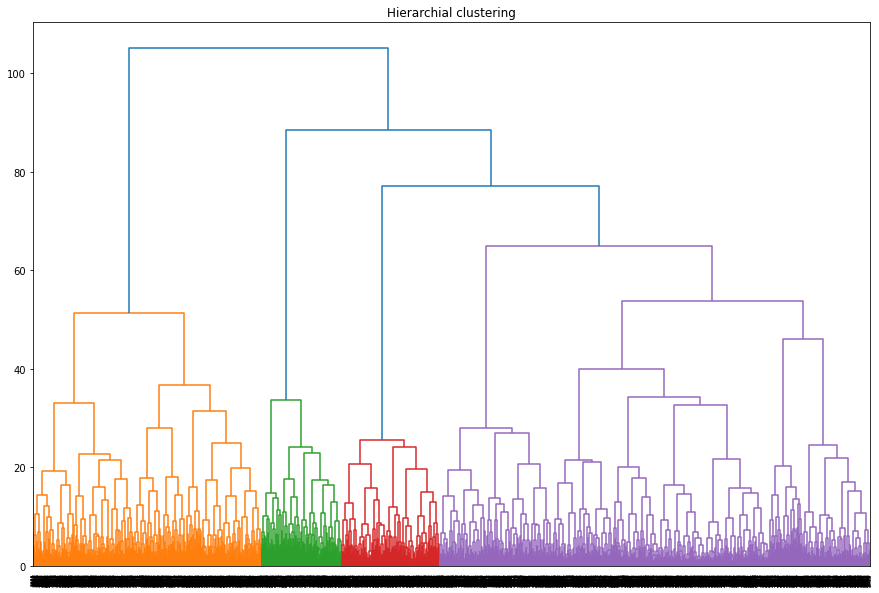

In [150]:
# отложим в сторону столбец с оттоком
#churn_column = df['Churn']
#df = df.drop('Churn', axis=1)

# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

In [151]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров  


In [152]:
df['labels'] = labels
# вычисление средних значений признаков для каждого кластера
means = df.groupby('labels').mean()
means.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)
means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
labels,,,,,,,,,,,,,,
0,0.534247,0.865753,0.479452,0.309589,0.000000,4.882192,0.430137,29.347945,143.645302,4.558904,4.035616,1.925248,1.810416,0.246575
1,0.471511,1.000000,0.343518,0.227911,1.000000,1.961189,0.348472,28.307184,132.397105,1.871181,2.630058,1.367426,1.156632,0.471511
2,0.496945,0.962322,0.782077,0.578411,1.000000,10.912424,0.545825,30.011202,161.526081,9.976578,4.771894,1.993443,1.986260,0.025458
3,0.497890,0.000000,0.466245,0.082278,1.000000,2.455696,0.225738,28.603376,137.342443,2.286920,2.907173,1.757992,1.594676,0.407173
4,0.574333,0.975858,0.371029,0.246506,0.998729,2.757306,0.471410,30.161372,163.146537,2.520966,4.846252,2.921675,2.922923,0.060991


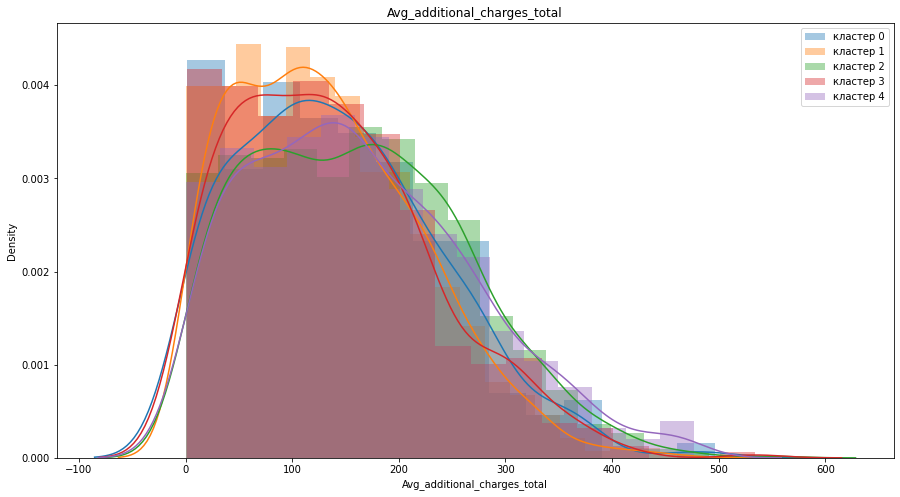

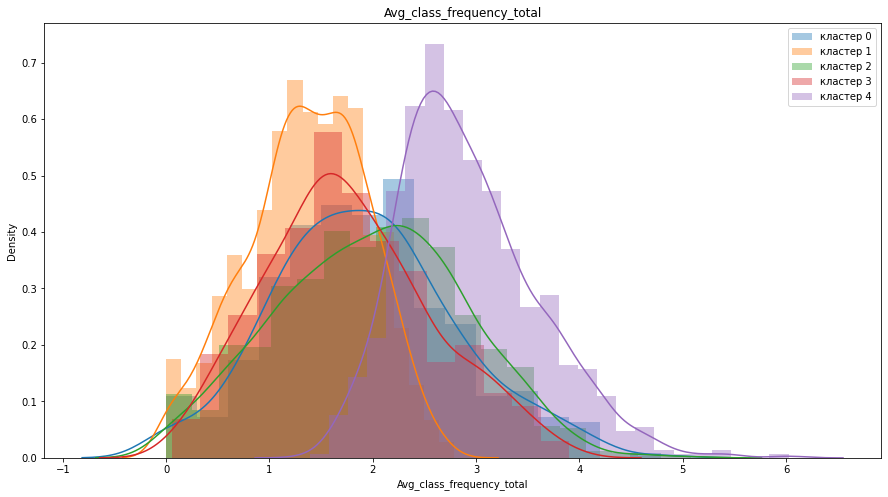

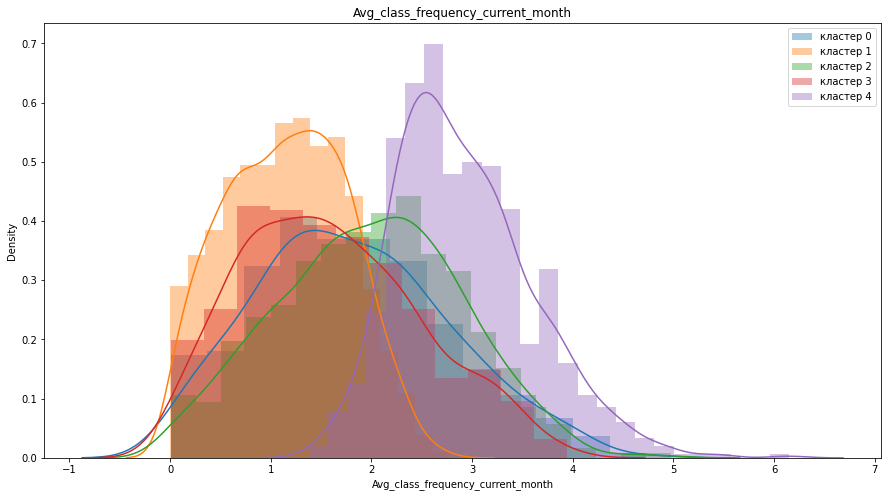

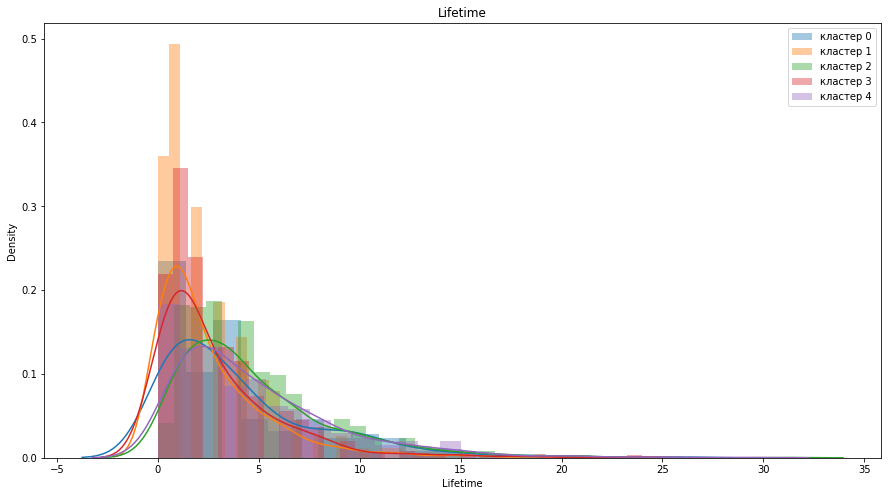

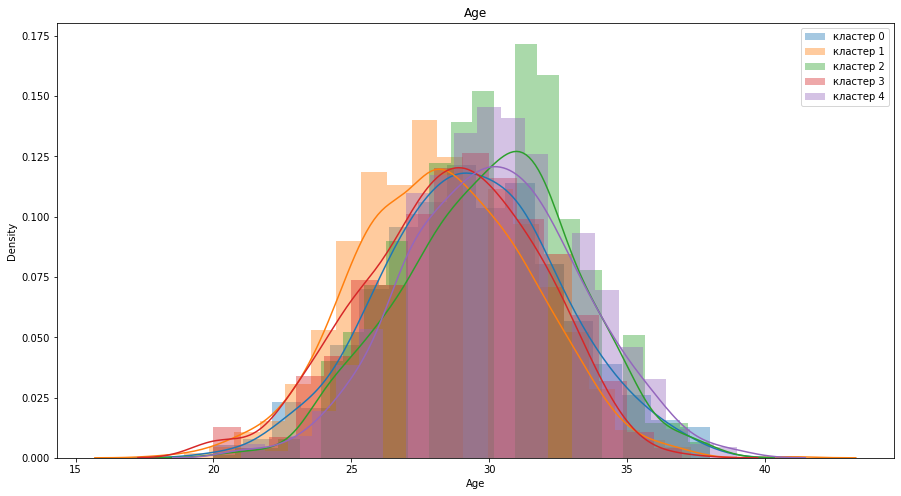

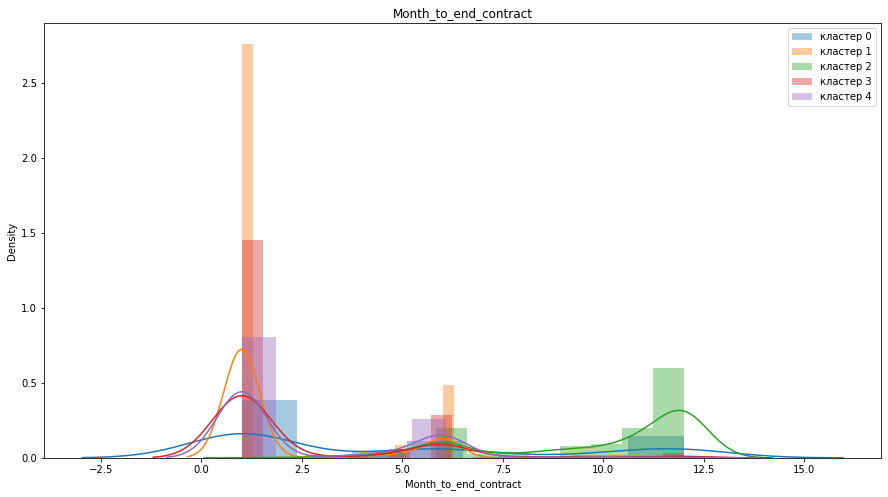

In [153]:
#Выделяем не категорийные признаки
columns = ['Avg_additional_charges_total', 'Avg_class_frequency_total',
           'Avg_class_frequency_current_month', 'Lifetime', 'Age', 'Month_to_end_contract'
           ]

# Построение распределений признаков для каждого кластера
warnings.filterwarnings("ignore")
for column in columns:
        plt.figure(figsize=(15,8)) 
        plt.title(column)
        sns.distplot(df[df['labels']==0][column], label='кластер 0', kde=True);
        sns.distplot(df[df['labels']==1][column], label='кластер 1', kde=True);
        sns.distplot(df[df['labels']==2][column], label='кластер 2', kde=True);
        sns.distplot(df[df['labels']==3][column], label='кластер 3', kde=True);
        sns.distplot(df[df['labels']==4][column], label='кластер 4', kde=True);
        plt.legend();
        plt.show();



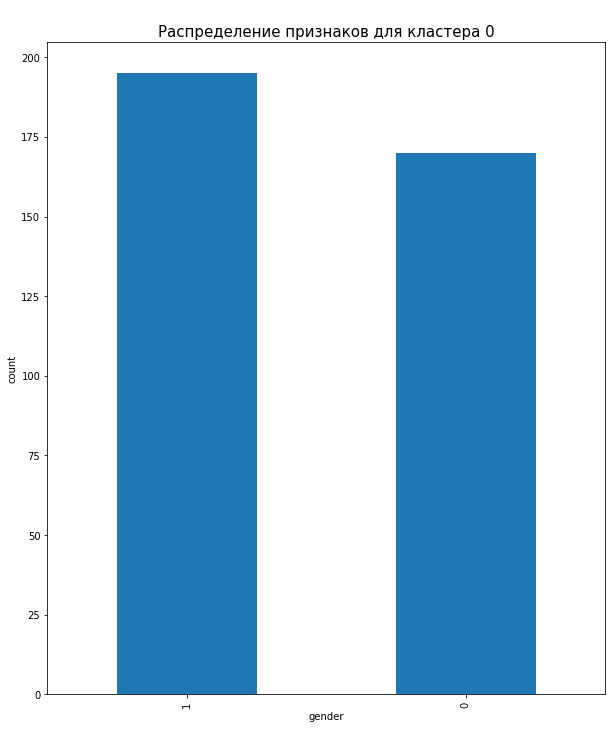

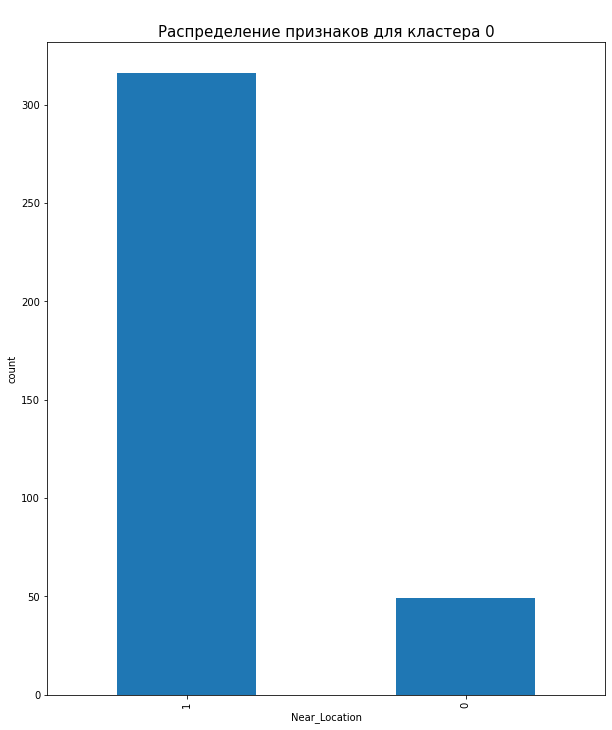

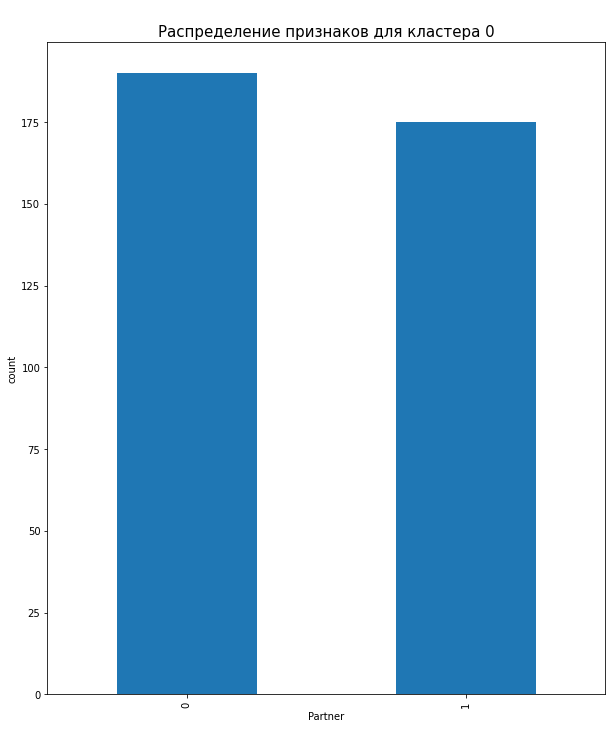

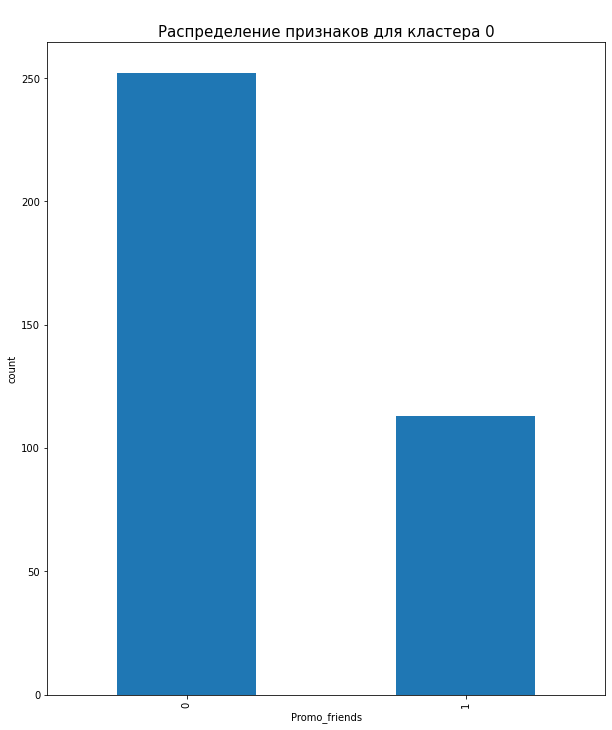

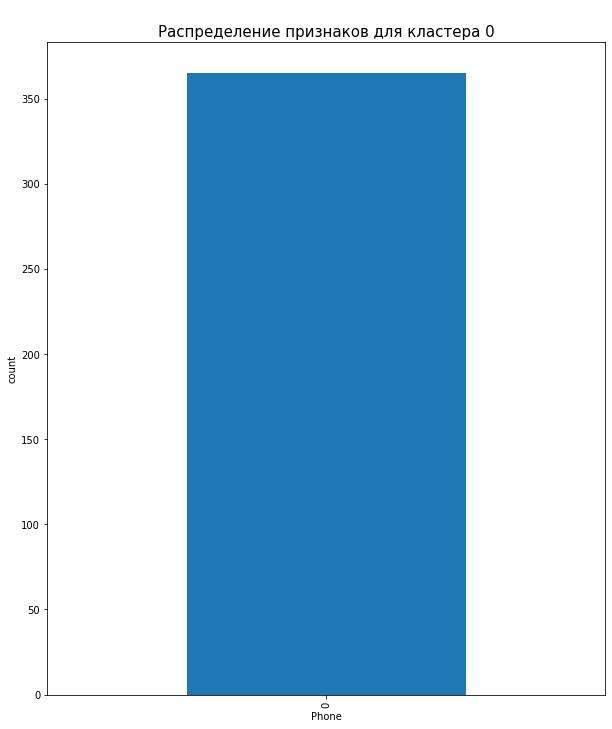

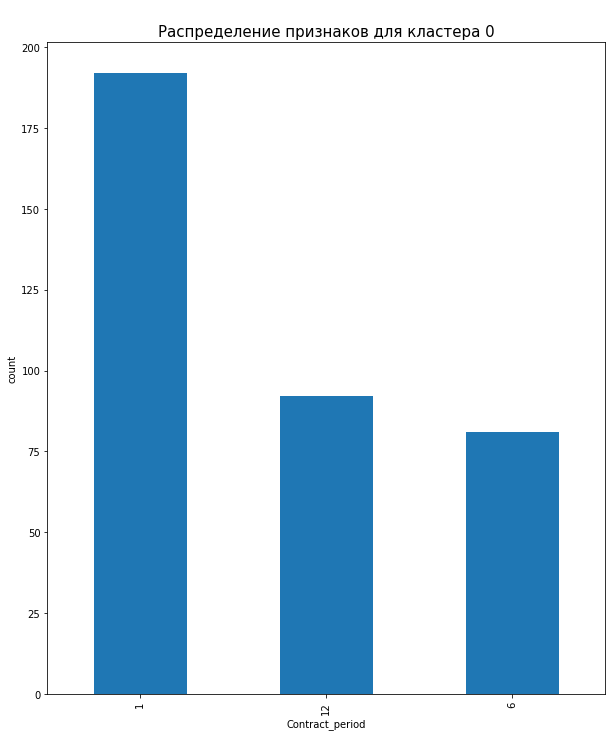

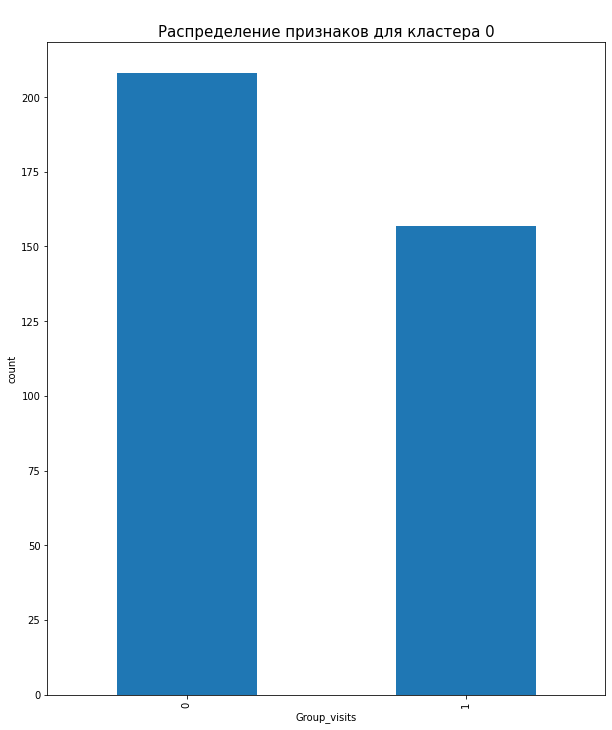

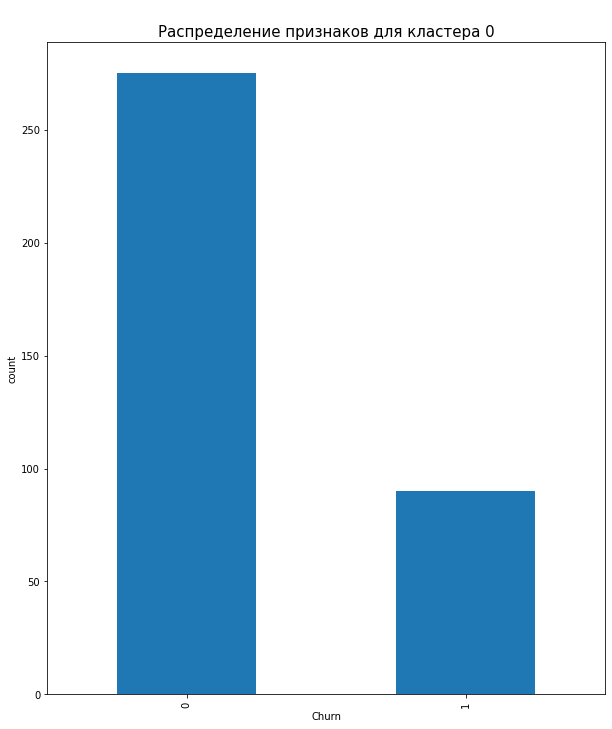

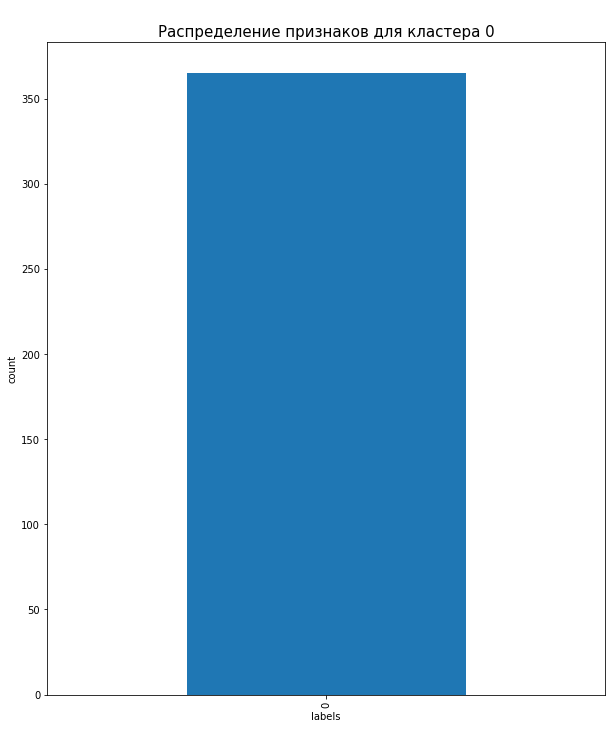

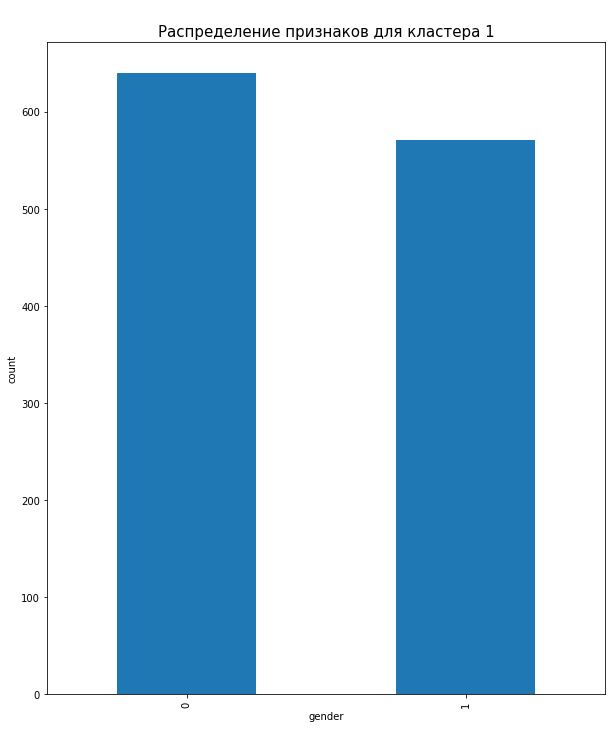

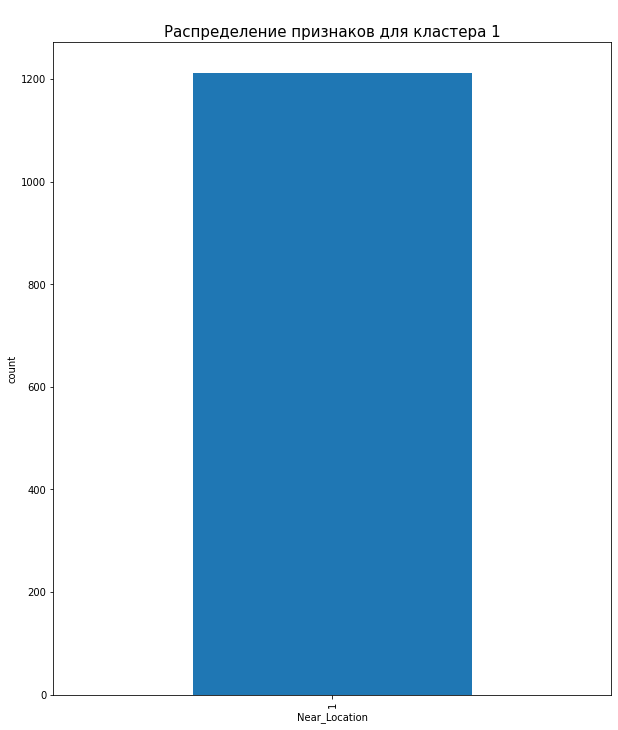

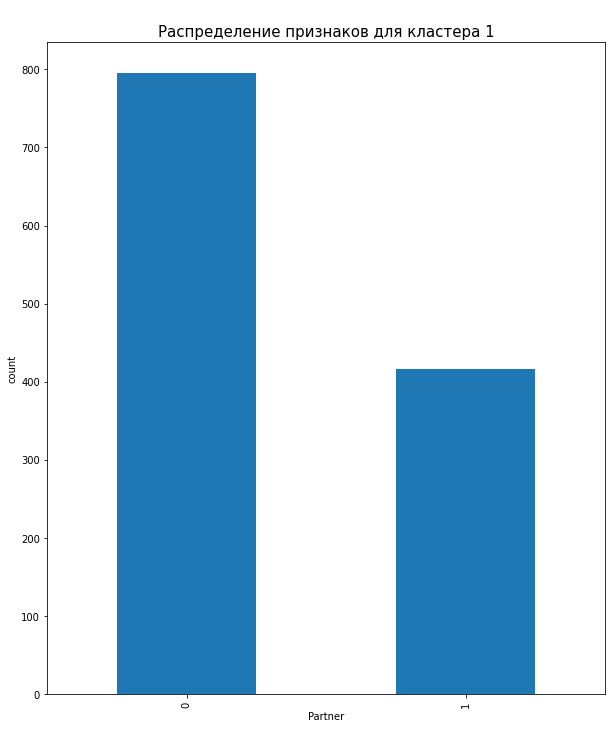

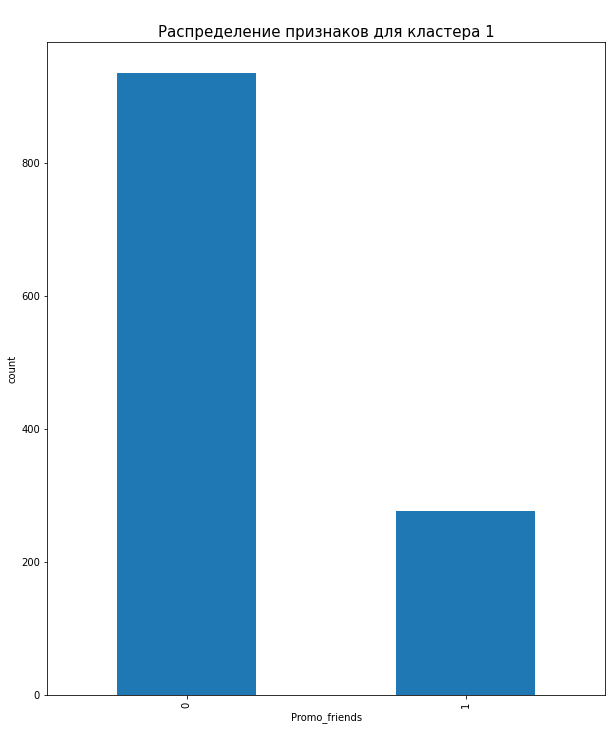

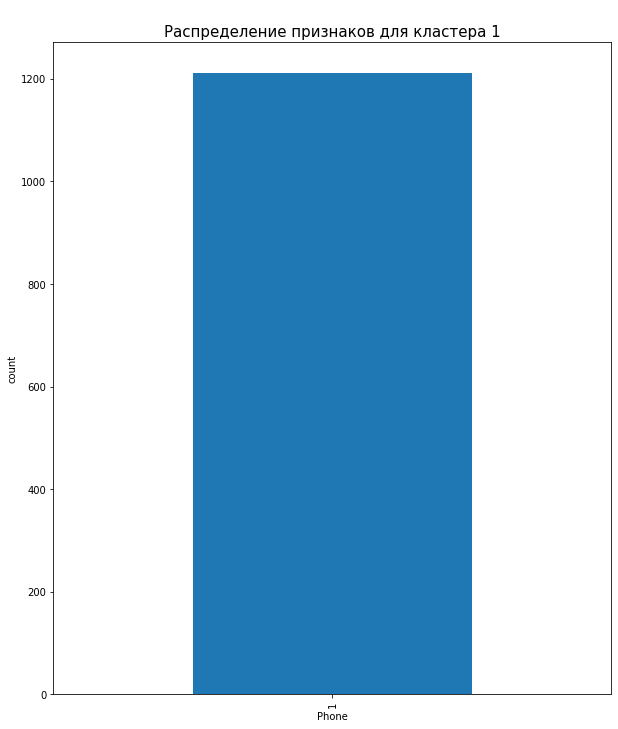

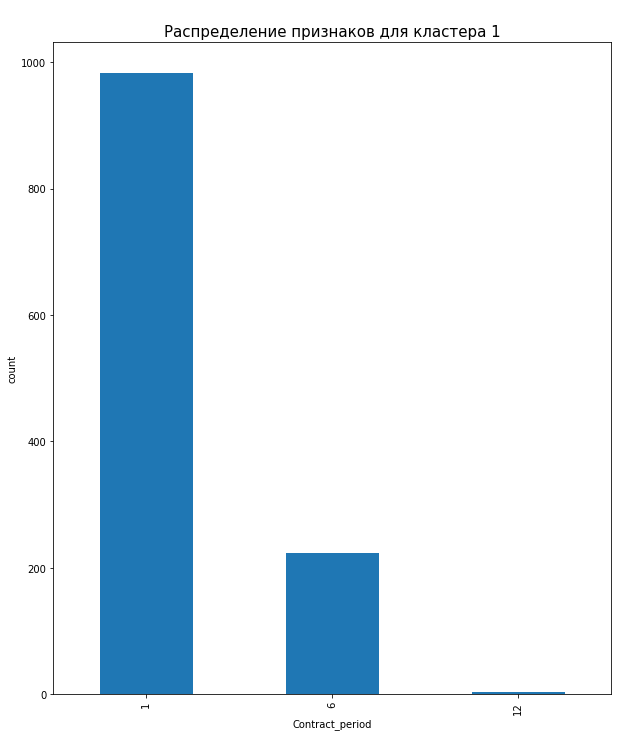

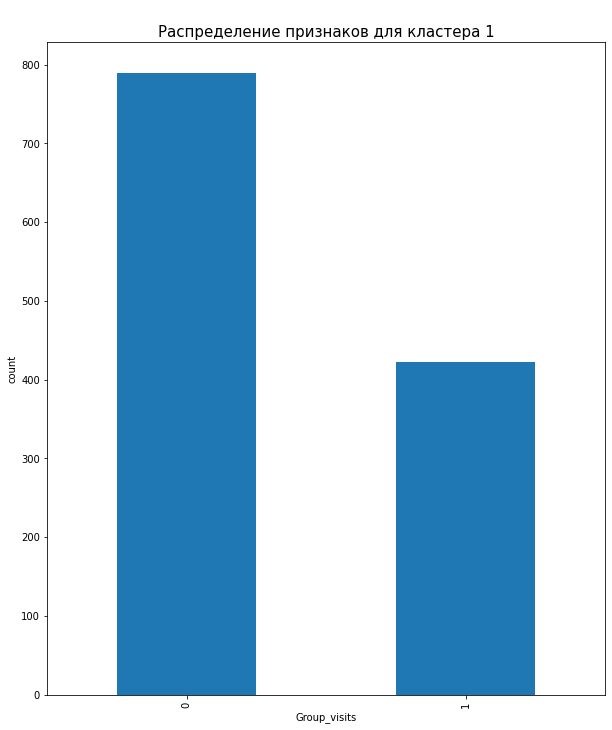

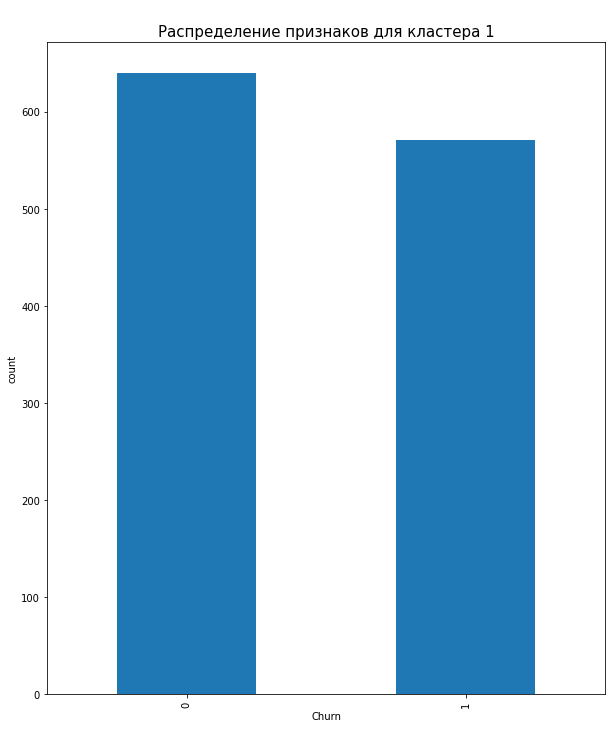

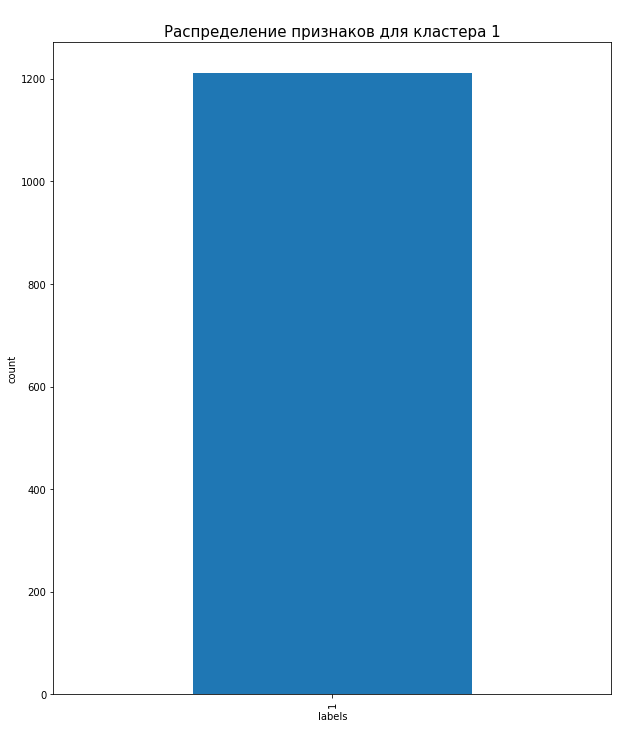

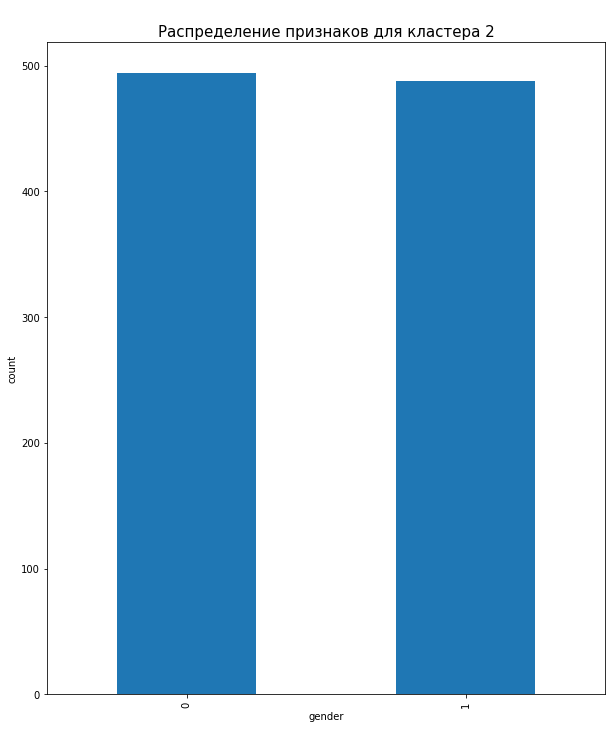

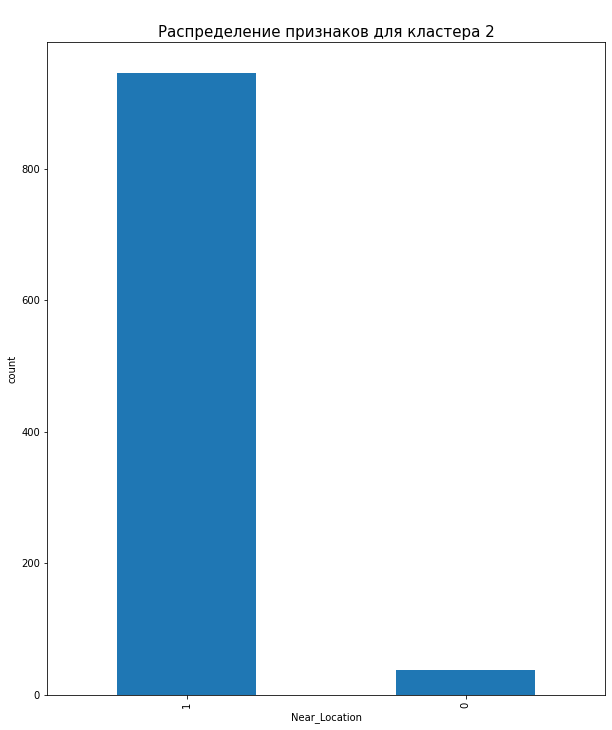

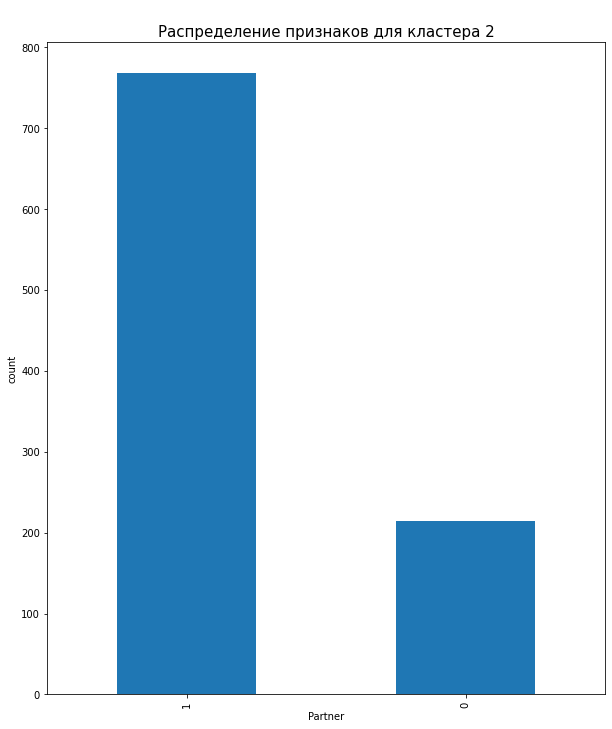

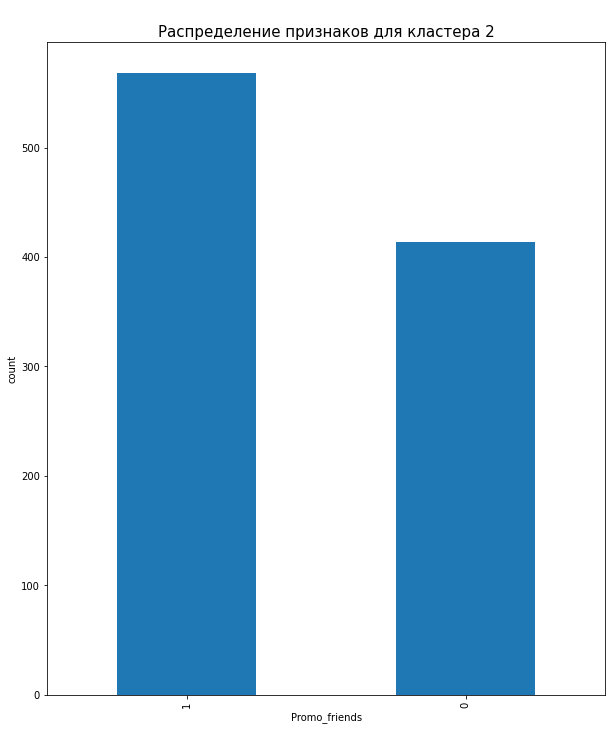

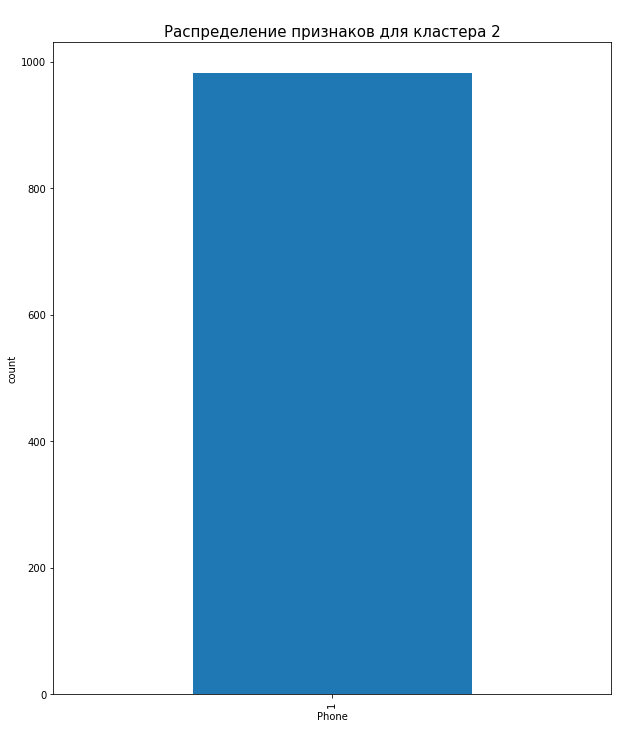

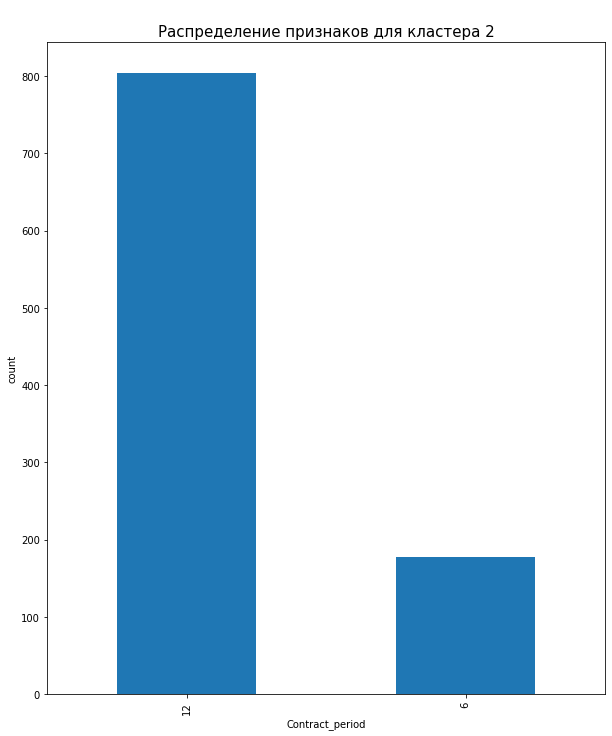

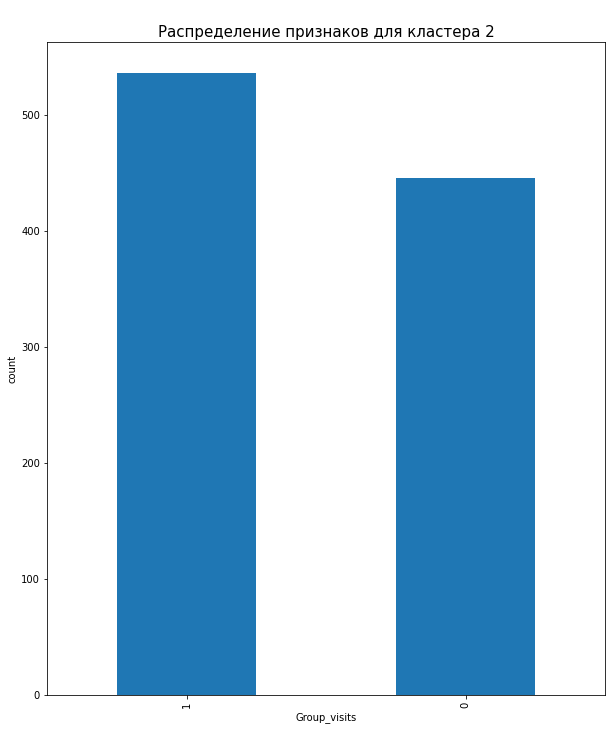

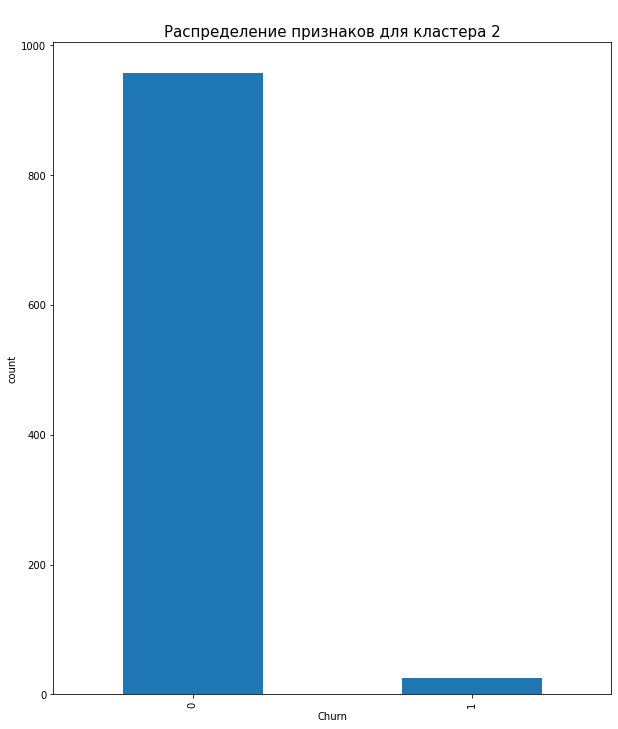

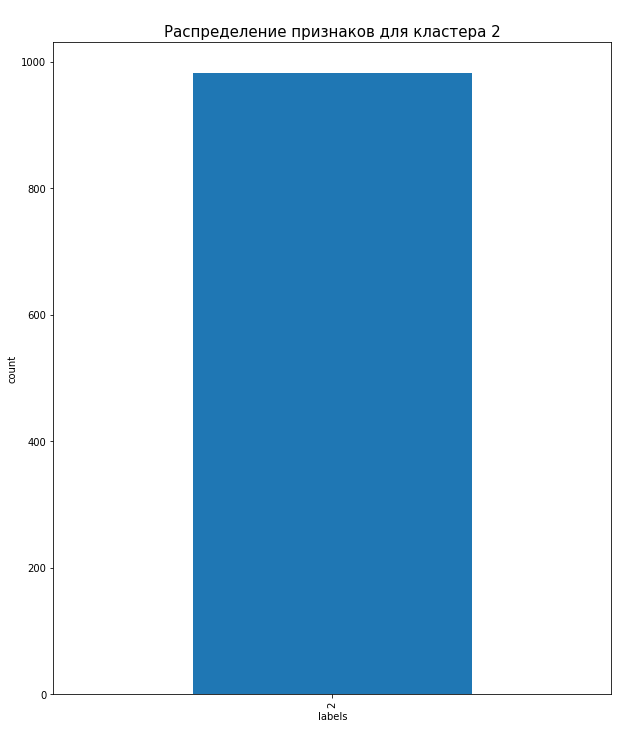

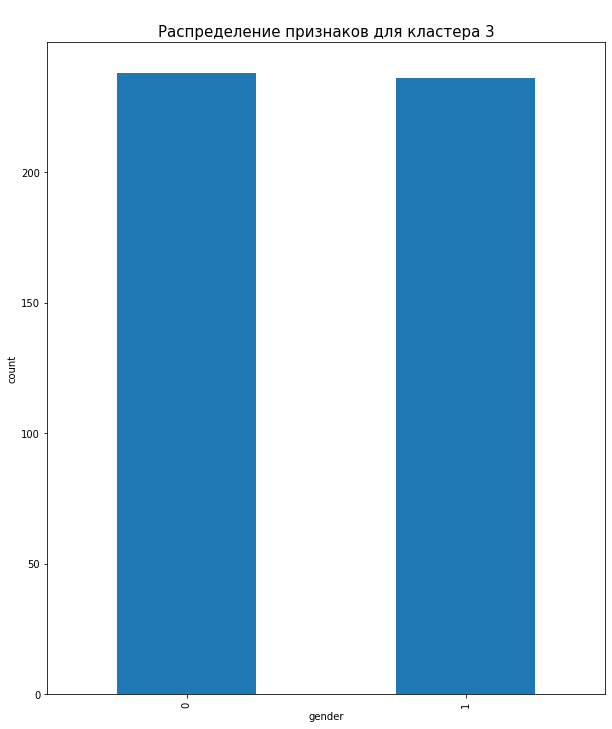

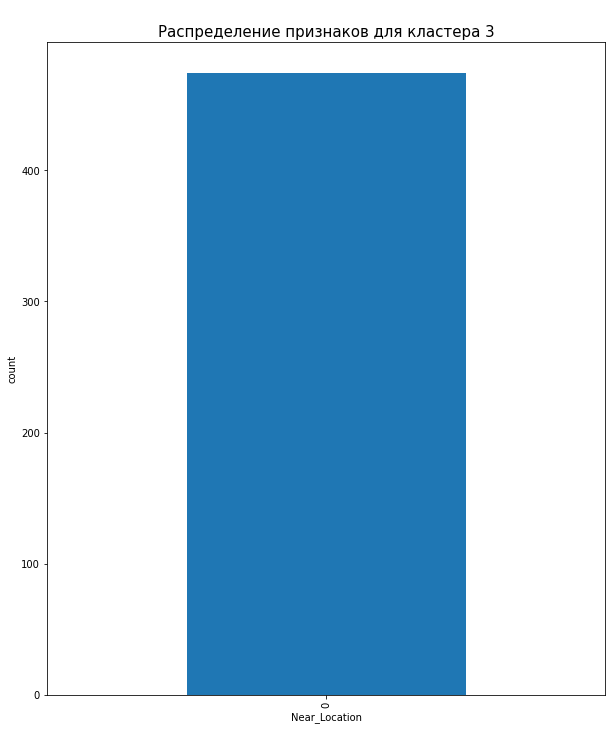

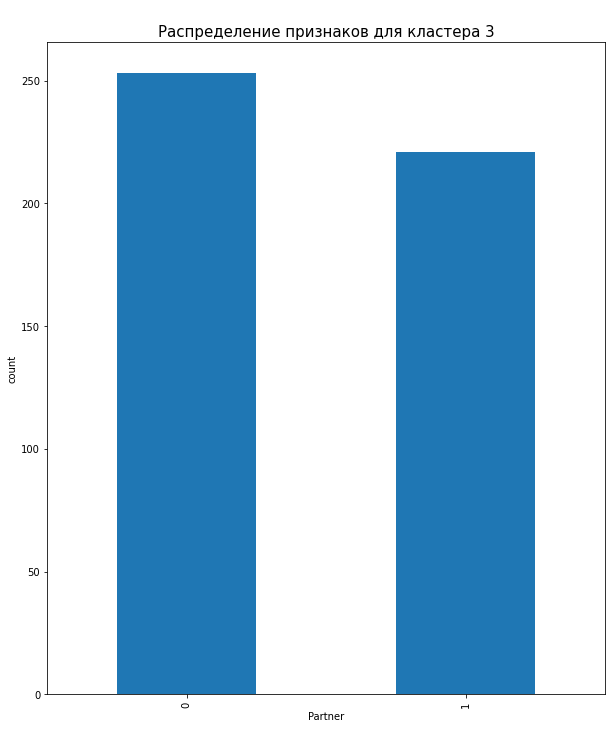

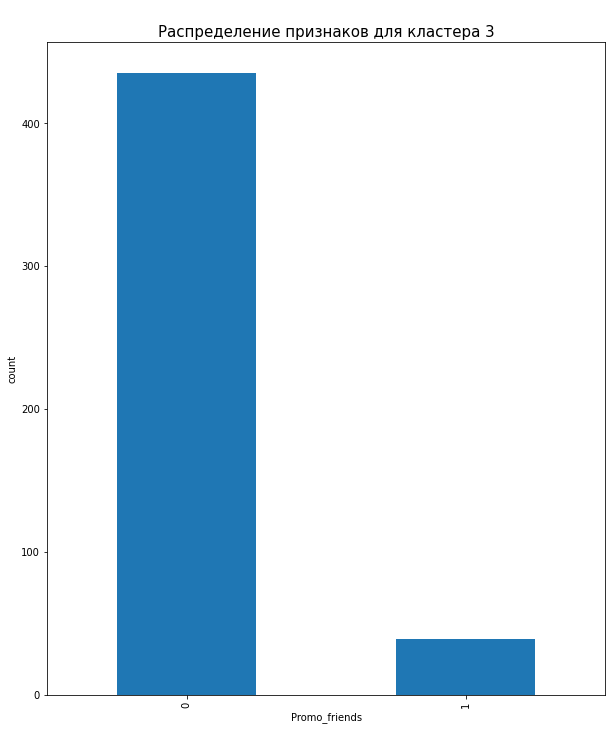

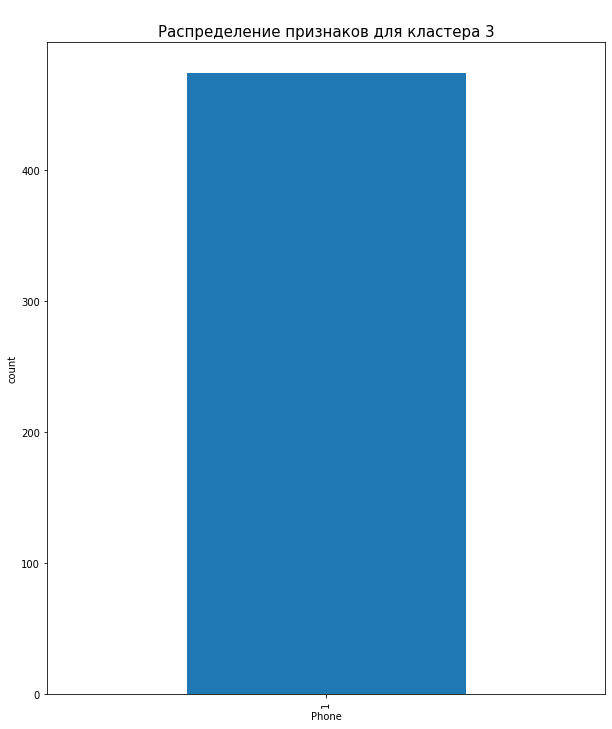

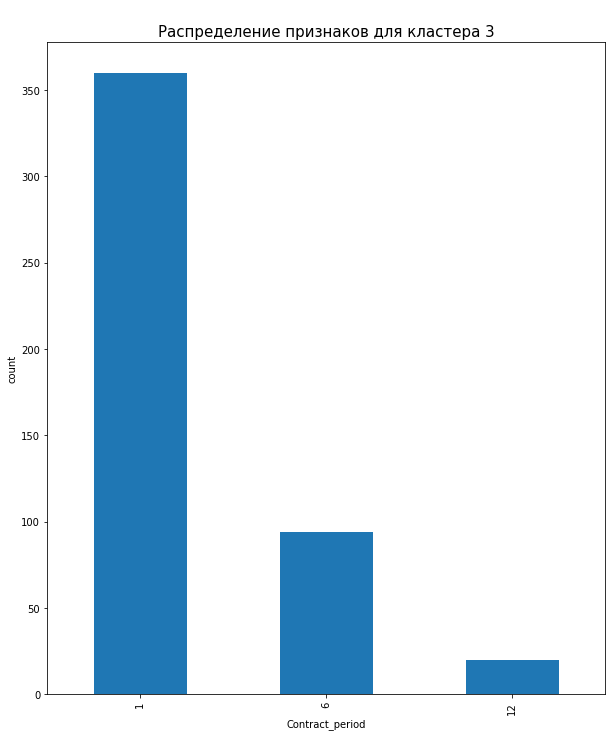

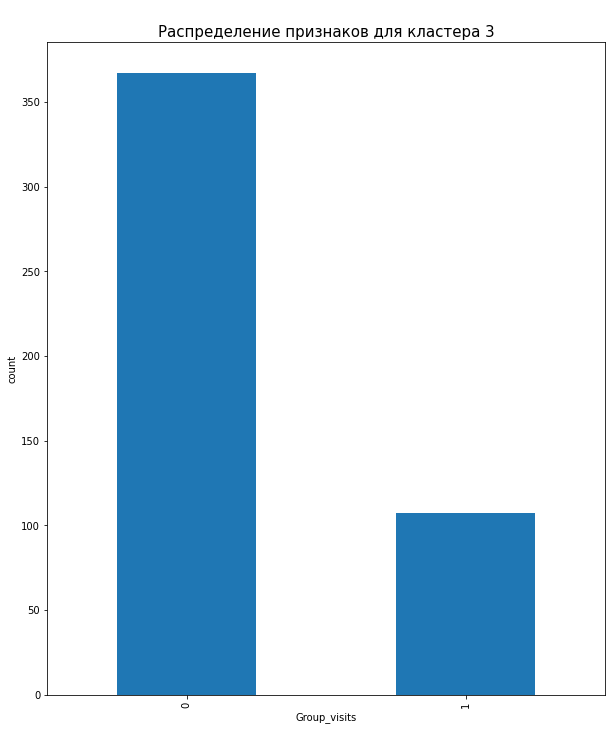

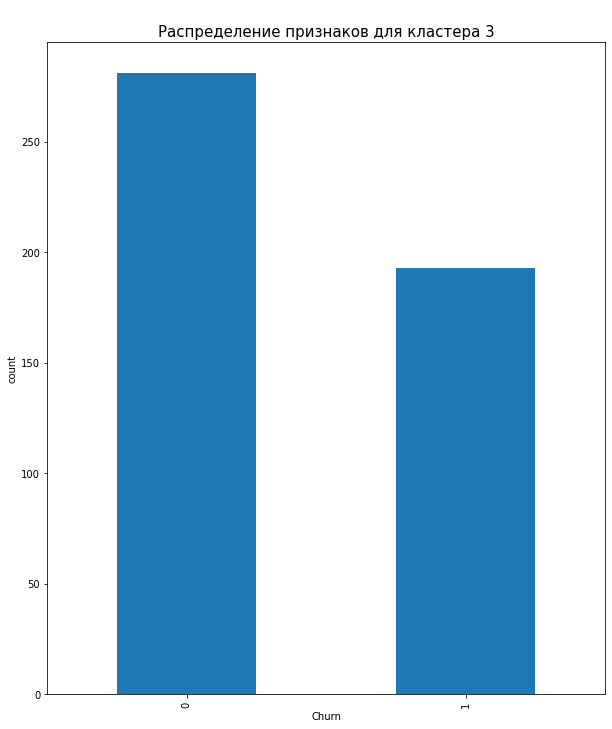

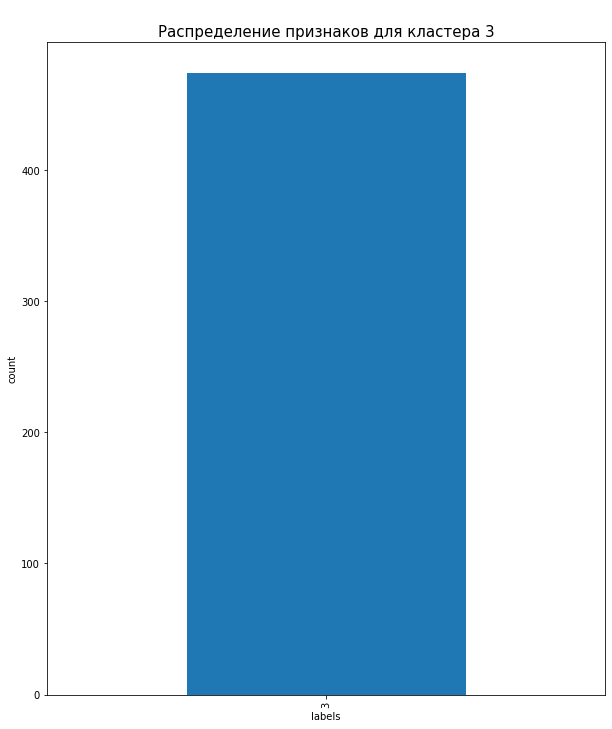

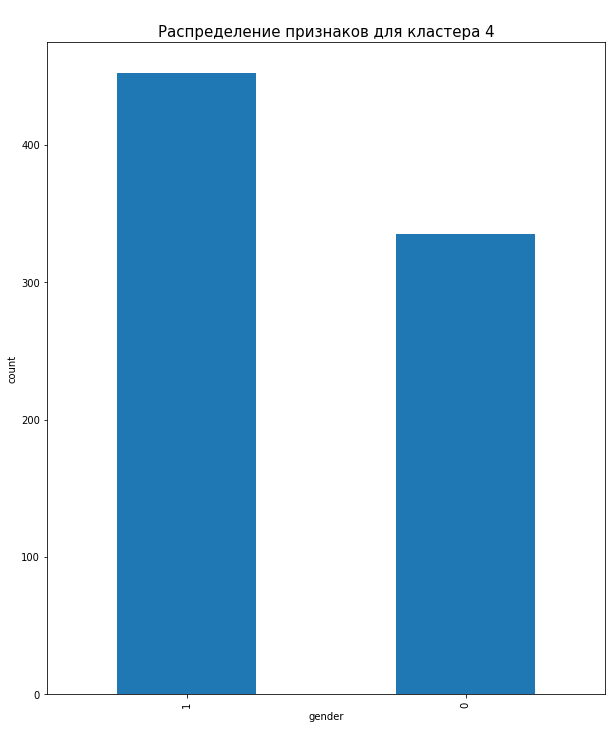

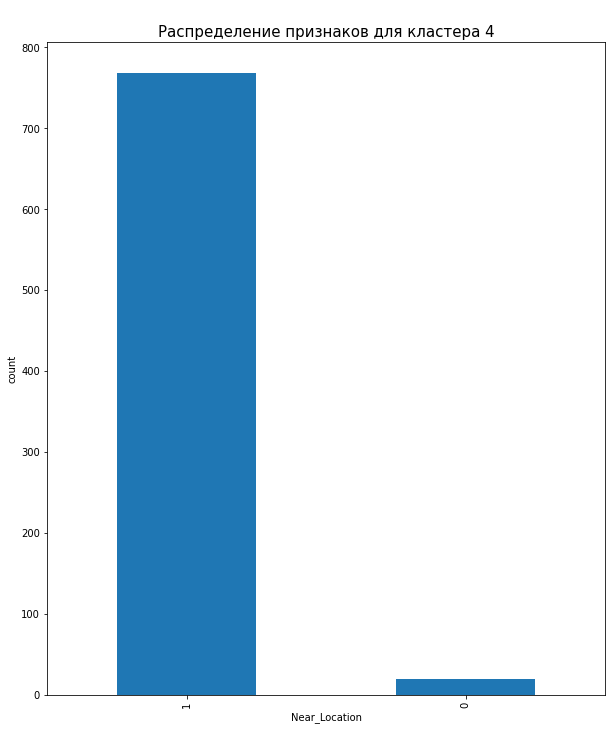

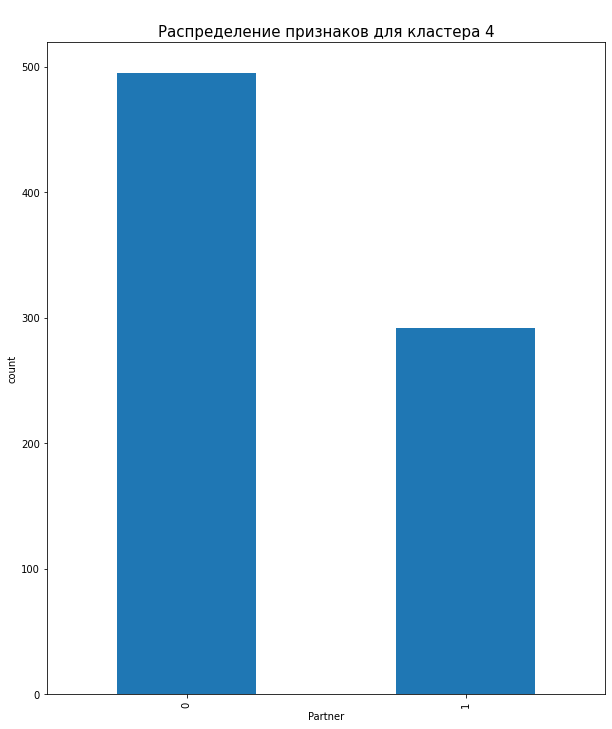

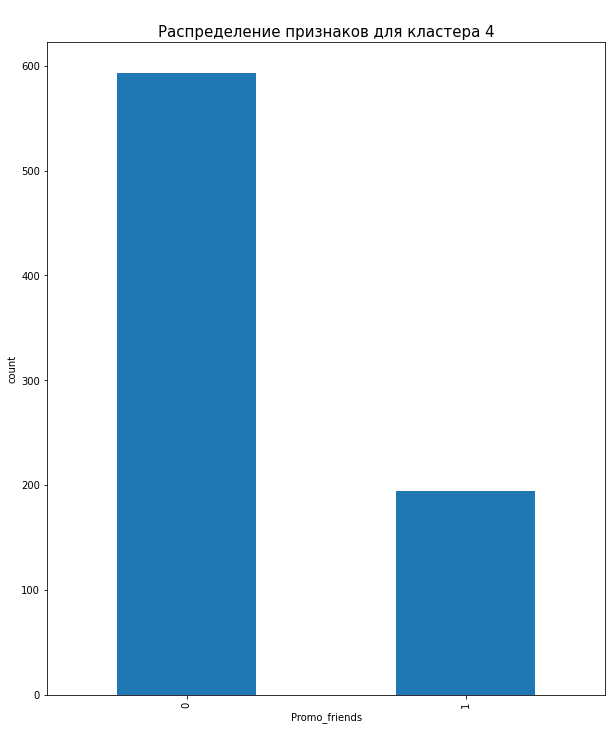

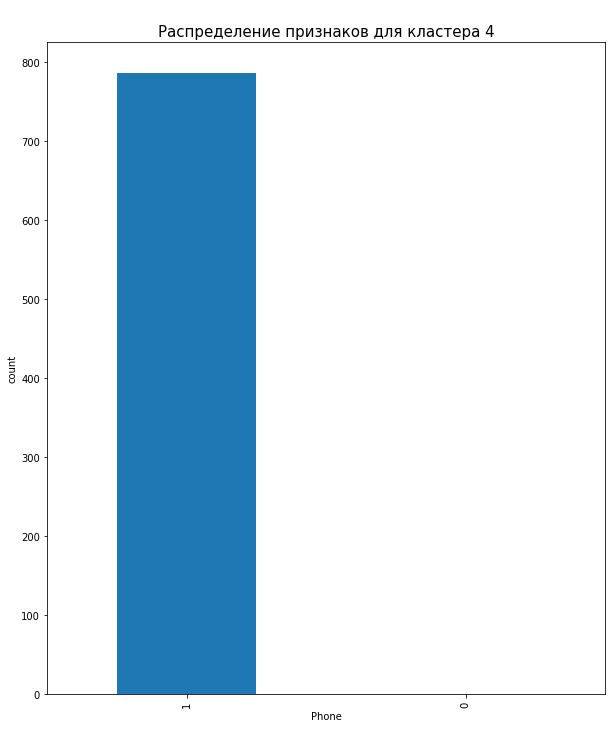

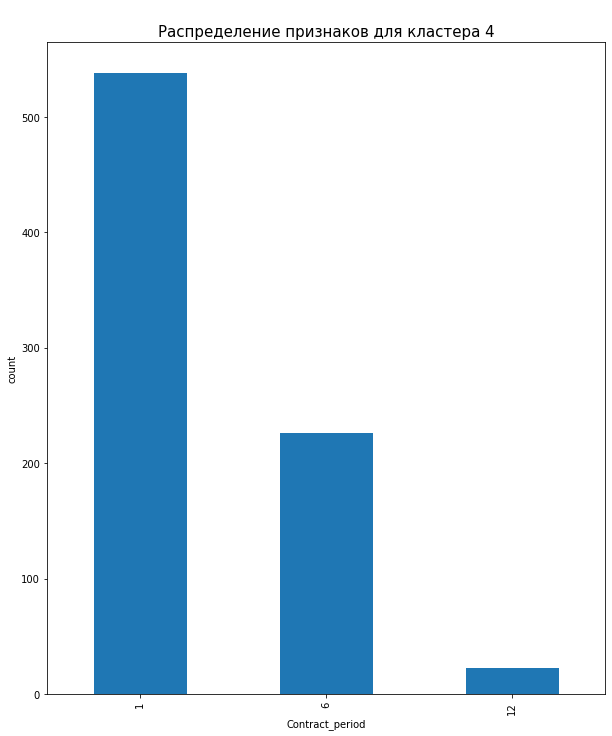

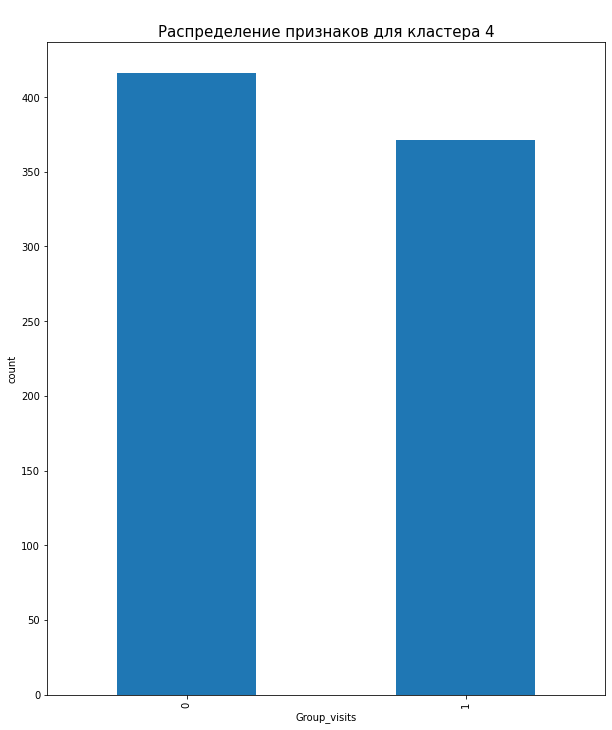

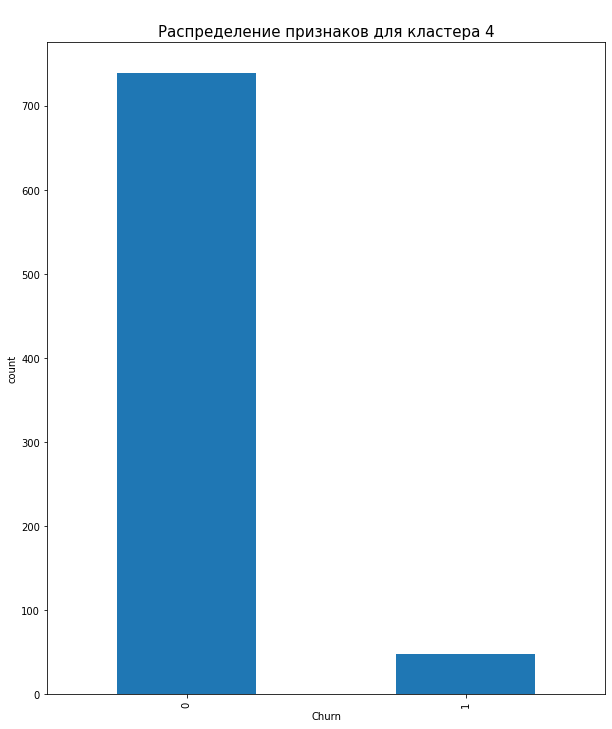

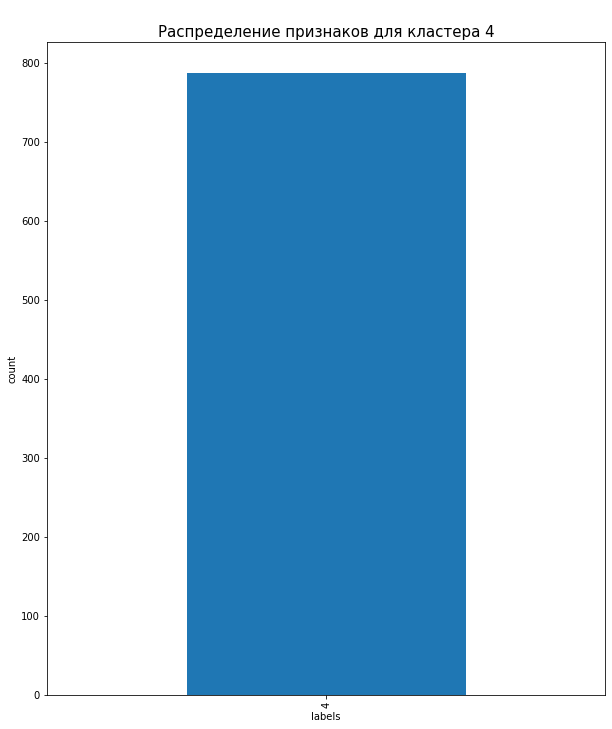

In [155]:
#Выделяем не категорийные признаки
columns = ['Avg_additional_charges_total', 'Avg_class_frequency_total',
           'Avg_class_frequency_current_month', 'Lifetime', 'Age', 'Month_to_end_contract'
           ]

# Построение распределений признаков для каждого кластера
for value in [0, 1, 2, 3, 4]:
    for column in df.columns:
        if column not in columns:
            df[df['labels'] == value][column].value_counts().plot(kind='bar', figsize=(10, 12))
            plt.xlabel(column)
            plt.ylabel('count')
            plt.title('\nРаспределение признаков для кластера {}'.format(value), fontsize=15)
            plt.show()
            

Кластер 0\
Отток - 25% 
   Живут или работают недалеко от фитнес-центра\
   В среднем 4.88 месяцев контракты\
   Средние показатели по кол-ву посещений за всё время и в последний месяц\
   Нет мобильного номера\
Кластер 1\
   Отток - 47%\
   Живут или работают недалеко от фитнес-центра\
   Меньше всех посещают клуб - 1,37 раз в неделю\
   Договора НЕ на длительный срок - в среднем 1,96 месяцев\
Кластер 2\
   Отток - 3% - самый низкий\
   Живут или работают недалеко от фитнес-центра\
   Преобладают сотрудники компаний-партнеров - 78%\
   Заключают договора на длительный срок - 11 месяцев\
   Чаще всех посещают групповые занятия - 56%\
   Чаще всех пришли по промо акции- 58%\
Кластер 3\
   Отток - 41%\
   Живут или работают в другом районе\
   Низкий % - 8% пришли по промо акции (самый низкий)\
   Реже всех посещают групповые занятия\
Кластер 4\
   Отток - 6%\
   Живут или работают недалеко от фитнес-центра\
   В среднем 2,76 месяцев контракты\

# Общие выводы:
    Анализируя ушедших и оставшихся пользователей видны ощутимые различия в параметрах. Так время жизни оставшихся пользователей почти в 5 раз больше чем у ушедших (4,71 против 0,99).Оставшиеся пользователи имеют более долгосрочные абонементы (5,28 против 1,65).По средней частоте посещений незначительно выигрывают оставшиеся пользователи (2,06 против 1,62).Но если сравнивать среднюю частоту посещений за этот и предыдущий месяц то у группы ушедших есть рост этого параметра. Оставшиеся же стабильны.Также оставшиеся пользователи приносят больше выручки от доп. услуг (158,3 против 115,5).\
    По половому признаку различий в группах (ушедшие и оставшиеся) не имеется.\
    Больше остаются те, кому территориально удобнее.Больше остаются партнеры клуба. \
    Развитие партнерских программ одно из прибыльных направлений.А вот акция "приведи друга" работает не так хорошо, да доля ушедших мала, но она есть. Возможно плохо работает удержание клиента вцелом.\
    В основном уходят те, кто брал абонементы на короткий срок (1 месяц). Далее процент ушедших резко снижается.\
    Любители групповых программ остаются чаще, чем их ненависники.\
    По возрасту  больше уходят более молодые клиенты, возможно из-за того, что они более мобильные в выборе места проживания. Но по среднему возрасту значимых различий нет.\
    Характер зависимости суммарной выручки от доп услуг для двух групп не различается, но есть одно "но" - оставшиеся приносят больше выручки (возможно из-за того, что их количество больше.\
    В среднем ушедшие больше берут короткосрочные абонементы. Частота заключения абонементов на 6 и 12 месяцев для группы "оставшиеся" сопоставима.Ушедшие имеют короткосрочное время жизни.Оставшиеся клиенты посещают чаще фитнес-центр.\
    В нашем случае модель случайный лес имеет большую точность предсказаний,не смотря на более низкий показатель Recall (0.725 против 0,737)\
    Можно выделить 5 кластеров. \
    Кластер 0\
Отток - 25% 
Живут или работают недалеко от фитнес-центра\
В среднем 4.88 месяцев контракты\
Средние показатели по кол-ву посещений за всё время и в последний месяц\
Нет мобильного номера\
    Кластер 1\
Отток - 47%\
Живут или работают недалеко от фитнес-центра\
Меньше всех посещают клуб - 1,37 раз в неделю\
Договора НЕ на длительный срок - в среднем 1,96 месяцев\
    Кластер 2\
Отток - 3% - самый низкий\
Живут или работают недалеко от фитнес-центра\
Преобладают сотрудники компаний-партнеров - 78%\
Заключают договора на длительный срок - 11 месяцев\
Чаще всех посещают групповые занятия - 56%\
Чаще всех пришли по промо акции- 58%\
    Кластер 3\
Отток - 41%\
Живут или работают в другом районе\
Низкий % - 8% пришли по промо акции (самый низкий)\
Реже всех посещают групповые занятия\
    Кластер 4\
Отток - 6%\
Живут или работают недалеко от фитнес-центра\
В среднем 2,76 месяцев контракты\
    Можно вынести следующие рекомендации:\
    Продавать больше долгосрочных абонементов, т.к. у таких клиентов меньше всего отток.\
    Увеличивать время жизни клиента. Предлагать новые услуги или каким-то образом зазывать и удерживать клиента.